In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor
import tensorflow as tf
import tensorboard
import keras
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns',None)

## Load the Data:

In [2]:
df=pd.read_csv("C:/AI&ML Engineer/Projects/Apple/diabetes Prediction/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [13]:
df.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [14]:
continuous_variables=['BMI','DiabetesPedigreeFunction']
discrete_categorical=['Outcome']

discrete_count=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Age']

In [15]:
len(continuous_variables)

2

In [16]:
len(discrete_categorical)

1

In [17]:
len(discrete_count)

6

In [18]:
df[continuous_variables].describe()

,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000
mean,31.992578,0.471876
std,7.884160,0.331329
min,0.000000,0.078000
25%,27.300000,0.243750
50%,32.000000,0.372500
75%,36.600000,0.626250
max,67.100000,2.420000


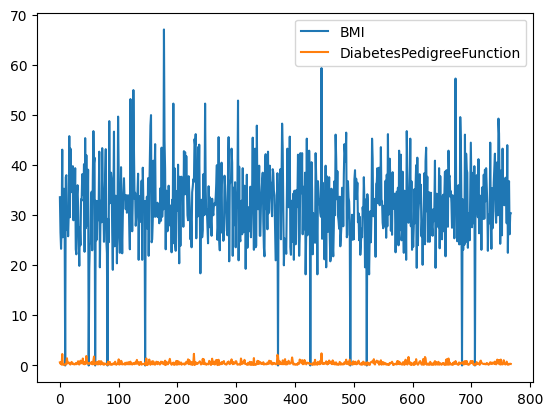

In [19]:
df[continuous_variables].plot()
plt.show()

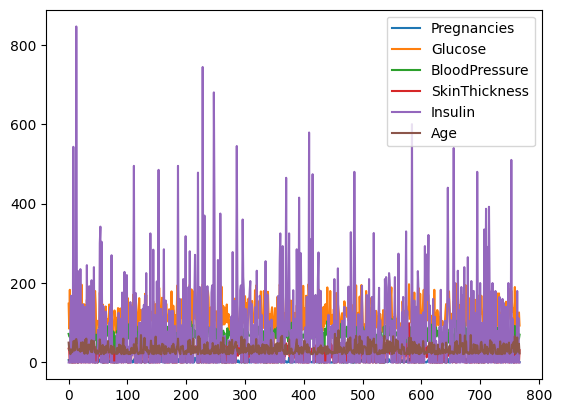

In [20]:
df[discrete_count].plot()
plt.show()

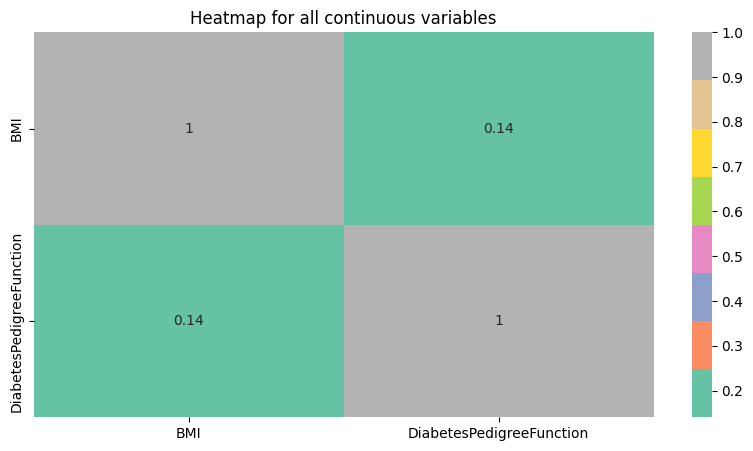

In [21]:
fig,ax=plt.subplots(figsize=(10,5))
sns.heatmap(df[continuous_variables].corr(),annot=True,cmap='Set2',ax=ax)
plt.title('Heatmap for all continuous variables')
plt.show()

# Column Wise Analysis:-

## Record Column:-

In [22]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [23]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [24]:
df['Pregnancies'].isnull().sum()

0

In [25]:
df['Pregnancies'].mode()[0]

1

In [26]:
df['Pregnancies'].skew()

0.9016739791518588

In [27]:
df['Pregnancies'].var(ddof=0)

11.339272393120657

In [28]:
df['Pregnancies'].std(ddof=0)

3.3673836124089958

In [29]:
df[['Pregnancies','Outcome']].corr()

,Pregnancies,Outcome
Pregnancies,1.000000,0.221898
Outcome,0.221898,1.000000


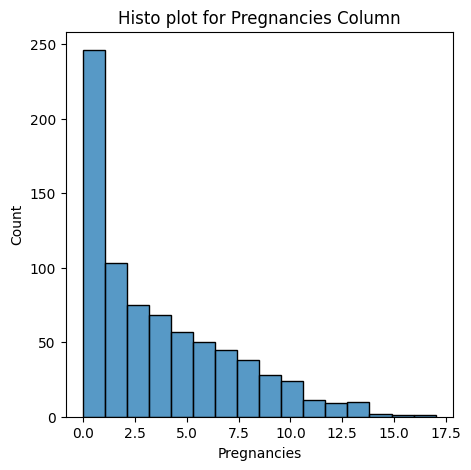

In [30]:
fig,ax=plt.subplots(figsize=(5,5))
sns.histplot(df['Pregnancies'])
plt.title('Histo plot for Pregnancies Column')
plt.show()

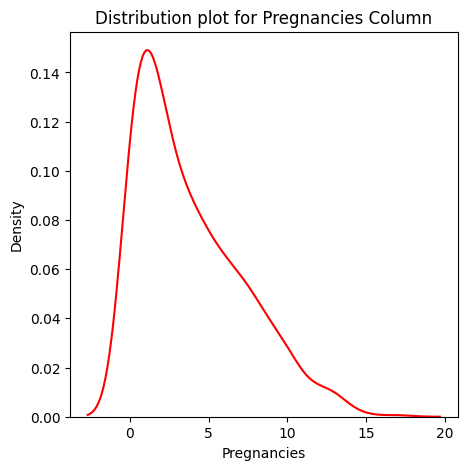

In [31]:
fig,ax=plt.subplots(figsize=(5,5))
sns.kdeplot(data=df['Pregnancies'],ax=ax,color='r')
plt.title('Distribution plot for Pregnancies Column')
plt.show()

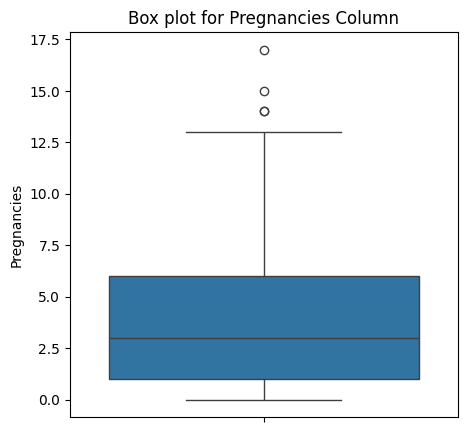

In [32]:
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(data=df['Pregnancies'],ax=ax)
plt.title('Box plot for Pregnancies Column')
plt.show()

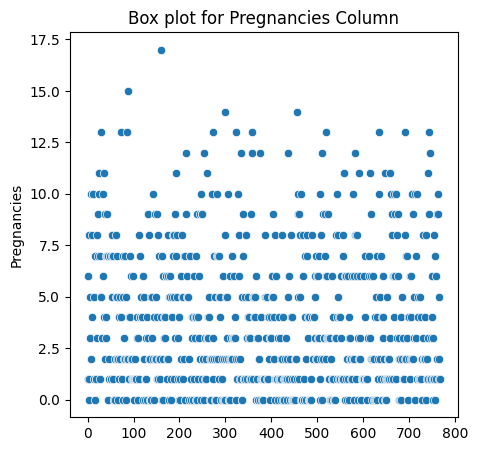

In [33]:
fig,ax=plt.subplots(figsize=(5,5))
sns.scatterplot(data=df['Pregnancies'],ax=ax)
plt.title('Box plot for Pregnancies Column')
plt.show()

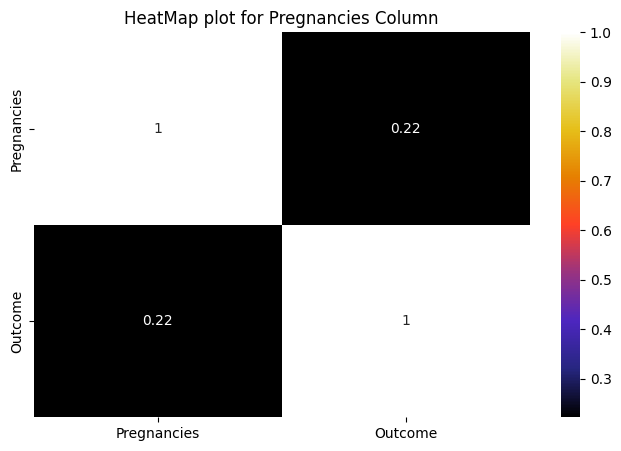

In [34]:
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(df[['Pregnancies','Outcome']].corr(),annot=True,cmap='CMRmap',ax=ax)
plt.title('HeatMap plot for Pregnancies Column')
plt.show()

## Glucose column:-

In [35]:
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [36]:
df[['Glucose','Outcome']].corr()

,Glucose,Outcome
Glucose,1.000000,0.466581
Outcome,0.466581,1.000000


In [37]:
df[['Glucose','Outcome']].cov()

,Glucose,Outcome
Glucose,1022.248314,7.115079
Outcome,7.115079,0.227483


In [38]:
df['Glucose'].isnull().sum()

0

In [39]:
df['Glucose'].skew()

0.17375350179188992

In [40]:
df['Glucose'].var()

1022.2483142519557

In [41]:
df['Glucose'].std()

31.97261819513622

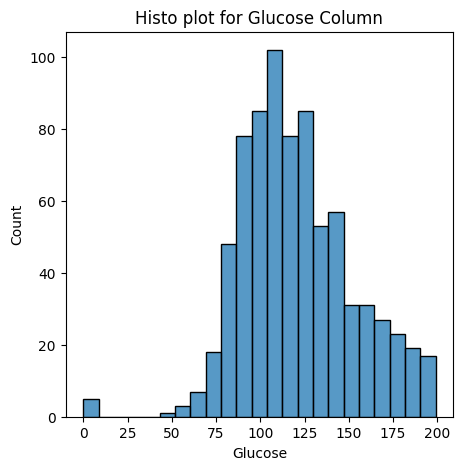

In [42]:
fig,ax=plt.subplots(figsize=(5,5))
sns.histplot(data=df['Glucose'],ax=ax)
plt.title('Histo plot for Glucose Column')
plt.show()

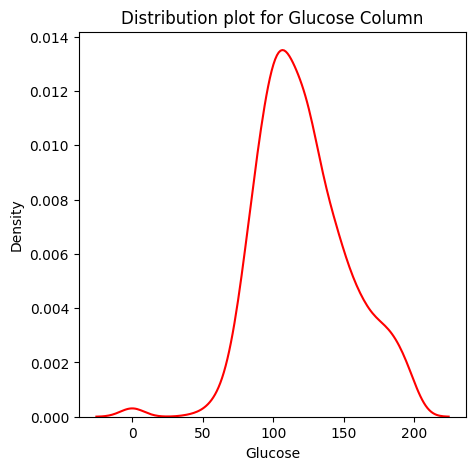

In [43]:
fig,ax=plt.subplots(figsize=(5,5))
sns.kdeplot(data=df['Glucose'],ax=ax,color='r')
plt.title('Distribution plot for Glucose Column')
plt.show()

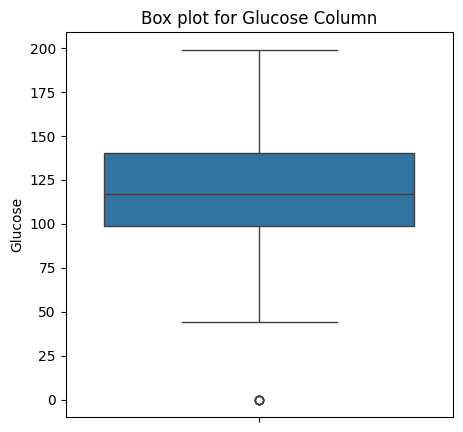

In [44]:
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(data=df['Glucose'],ax=ax)
plt.title('Box plot for Glucose Column')
plt.show()

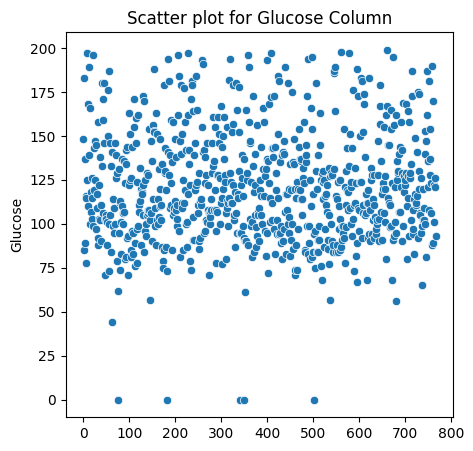

In [45]:
fig,ax=plt.subplots(figsize=(5,5))
sns.scatterplot(data=df['Glucose'],ax=ax)
plt.title('Scatter plot for Glucose Column')
plt.show()

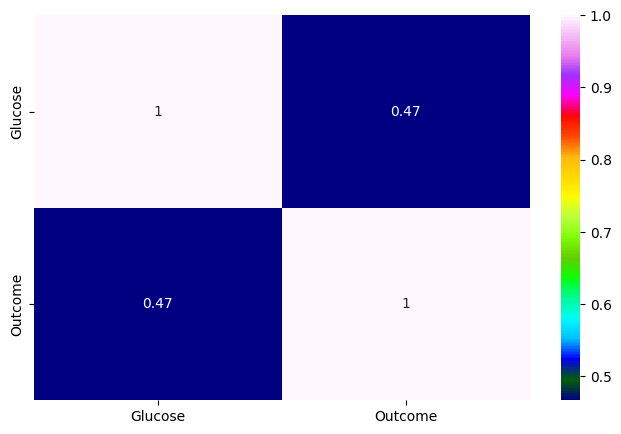

In [46]:
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(df[['Glucose','Outcome']].corr(),annot=True,cmap='gist_ncar',ax=ax)
plt.show()

## BloodPressure Column:-

In [47]:
df['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [48]:
df['BloodPressure'].isnull().sum()

0

In [49]:
df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [50]:
df['BloodPressure'].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64

In [51]:
df['BloodPressure'].skew()

-1.8436079833551302

In [52]:
df['BloodPressure'].var(ddof=0)

374.1594492594401

In [53]:
df['BloodPressure'].std(ddof=0)

19.343201628981696

In [54]:
df[['BloodPressure','Glucose']].cov(ddof=0)

,BloodPressure,Glucose
BloodPressure,374.159449,94.307999
Glucose,94.307999,1020.917262


In [55]:
df[['BloodPressure','Outcome']].corr()

,BloodPressure,Outcome
BloodPressure,1.000000,0.065068
Outcome,0.065068,1.000000


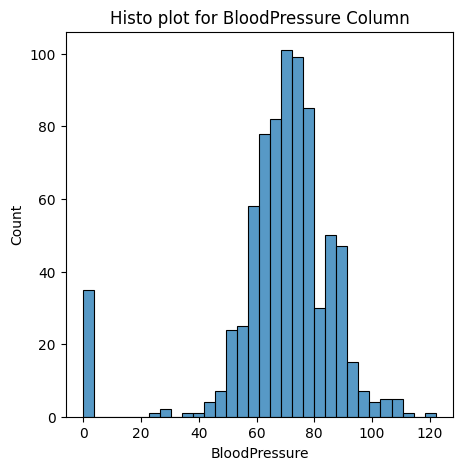

In [56]:
fig,ax=plt.subplots(figsize=(5,5))
sns.histplot(data=df['BloodPressure'],ax=ax)
plt.title('Histo plot for BloodPressure Column')
plt.show()

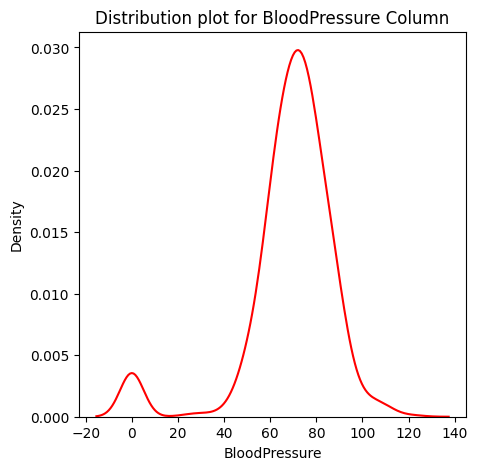

In [57]:
fig,ax=plt.subplots(figsize=(5,5))
sns.kdeplot(data=df['BloodPressure'],ax=ax,color='r')
plt.title('Distribution plot for BloodPressure Column')
plt.show()

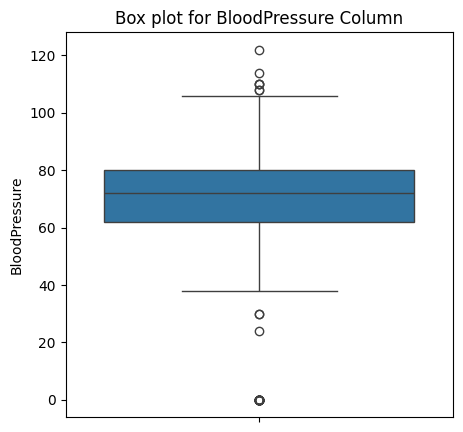

In [58]:
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(data=df['BloodPressure'],ax=ax)
plt.title('Box plot for BloodPressure Column')
plt.show()

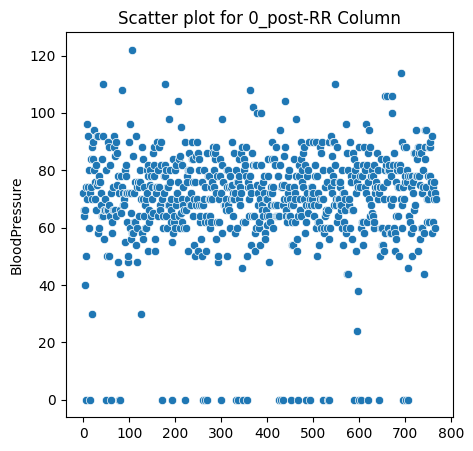

In [59]:
fig,ax=plt.subplots(figsize=(5,5))
sns.scatterplot(data=df['BloodPressure'],ax=ax)
plt.title('Scatter plot for 0_post-RR Column')
plt.show()

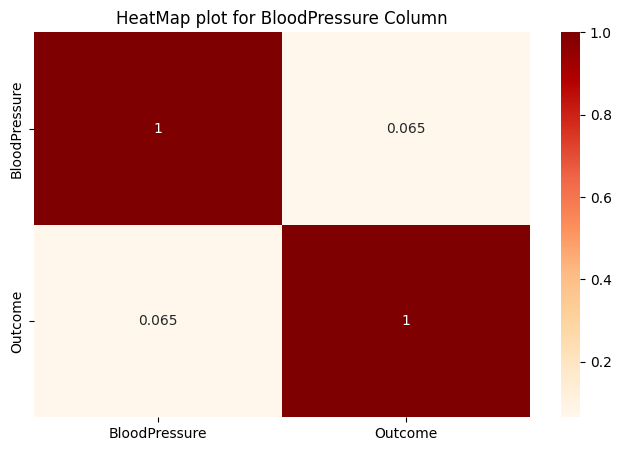

In [60]:
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(df[['BloodPressure','Outcome']].corr(),annot=True,cmap='OrRd',ax=ax)
plt.title('HeatMap plot for BloodPressure Column')
plt.show()

## SkinThickness column:-

In [61]:
df['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [62]:
df['SkinThickness'].skew()

0.10937249648187608

In [63]:
df['SkinThickness'].isnull().sum()

0

In [64]:
df['SkinThickness'].var(ddof=0)

254.14189995659726

In [65]:
df['SkinThickness'].std(ddof=0)

15.941828626496939

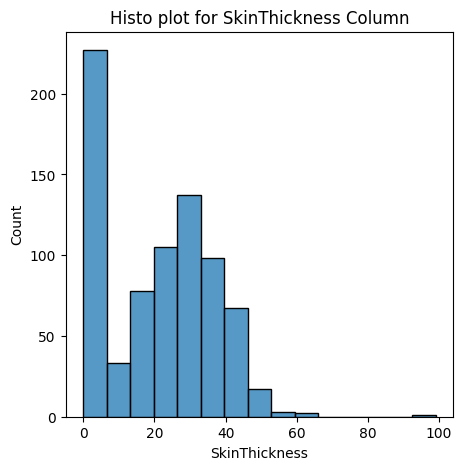

In [66]:
fig,ax=plt.subplots(figsize=(5,5))
sns.histplot(data=df['SkinThickness'],ax=ax)
plt.title('Histo plot for SkinThickness Column')
plt.show()

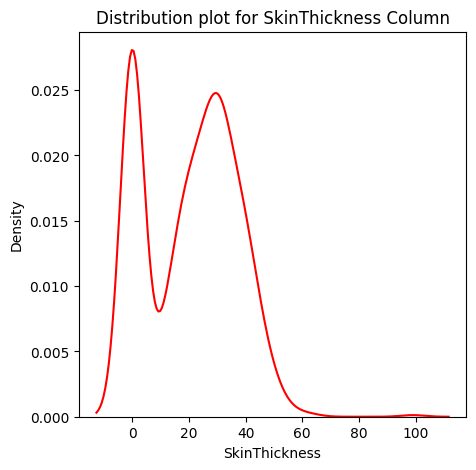

In [67]:
fig,ax=plt.subplots(figsize=(5,5))
sns.kdeplot(data=df['SkinThickness'],ax=ax,color='r')
plt.title('Distribution plot for SkinThickness Column')
plt.show()

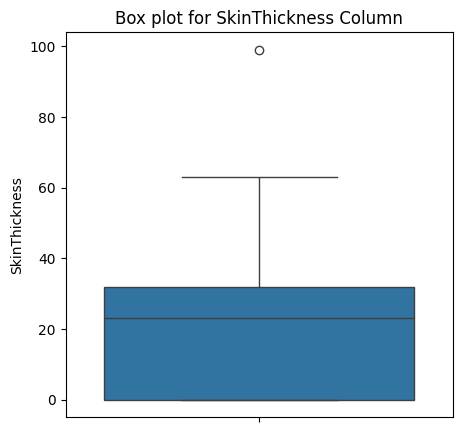

In [68]:
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(data=df['SkinThickness'],ax=ax)
plt.title('Box plot for SkinThickness Column')
plt.show()

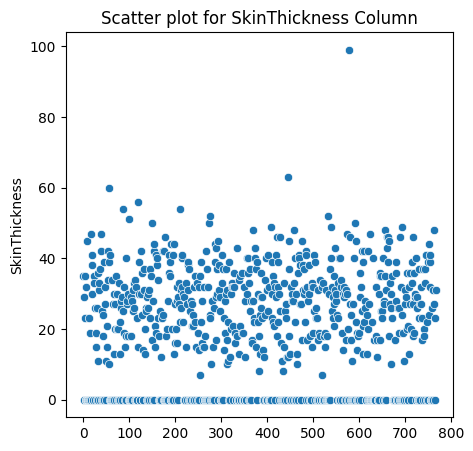

In [69]:
fig,ax=plt.subplots(figsize=(5,5))
sns.scatterplot(data=df['SkinThickness'],ax=ax)
plt.title('Scatter plot for SkinThickness Column')
plt.show()

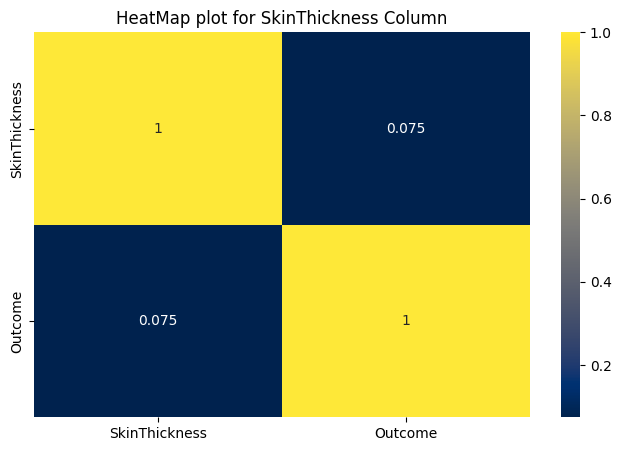

In [70]:
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(df[['SkinThickness','Outcome']].corr(),annot=True,cmap='cividis',ax=ax)
plt.title('HeatMap plot for SkinThickness Column')
plt.show()

## Insulin column:-

In [71]:
df['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [72]:
df['Insulin'].skew()

2.272250858431574

In [73]:
df['Insulin'].isnull().sum()

0

In [74]:
df['Insulin'].var(ddof=0)

13263.886874728734

In [75]:
df['Insulin'].std(ddof=0)

115.16894926467262

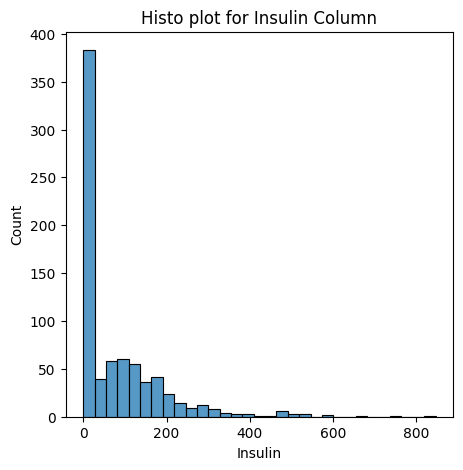

In [76]:
fig,ax=plt.subplots(figsize=(5,5))
sns.histplot(data=df['Insulin'],ax=ax)
plt.title('Histo plot for Insulin Column')
plt.show()

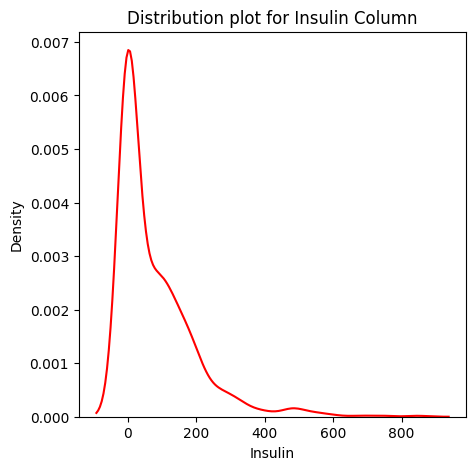

In [77]:
fig,ax=plt.subplots(figsize=(5,5))
sns.kdeplot(data=df['Insulin'],ax=ax,color='r')
plt.title('Distribution plot for Insulin Column')
plt.show()

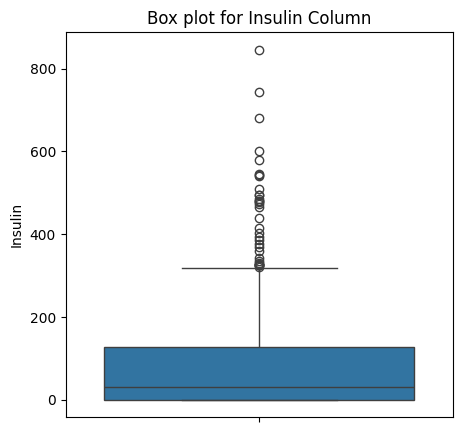

In [78]:
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(data=df['Insulin'],ax=ax)
plt.title('Box plot for Insulin Column')
plt.show()

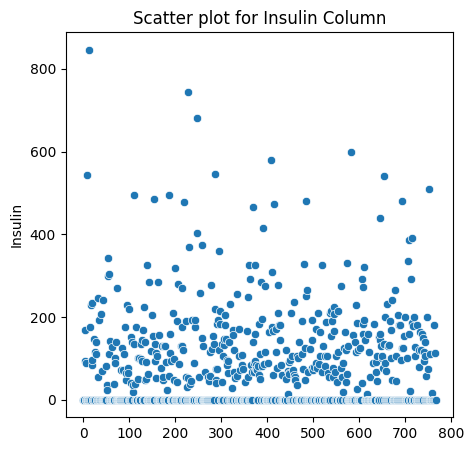

In [79]:
fig,ax=plt.subplots(figsize=(5,5))
sns.scatterplot(data=df['Insulin'],ax=ax)
plt.title('Scatter plot for Insulin Column')
plt.show()

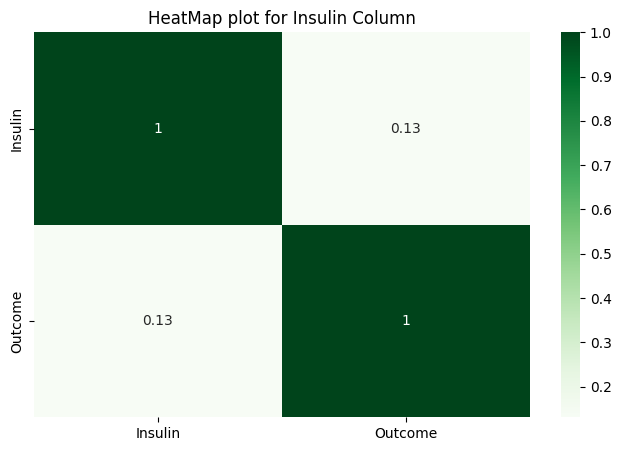

In [80]:
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(df[['Insulin','Outcome']].corr(),annot=True,cmap='Greens',ax=ax)
plt.title('HeatMap plot for Insulin Column')
plt.show()

## BMI column:-

In [81]:
df['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [82]:
df['BMI'].isnull().sum()

0

In [83]:
df['BMI'].skew()

-0.42898158845356543

In [84]:
df['BMI'].var(ddof=0)

62.079046478271486

In [85]:
df['BMI'].std(ddof=0)

7.87902573154013

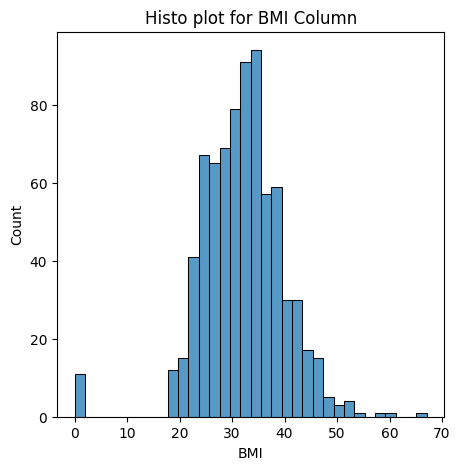

In [86]:
fig,ax=plt.subplots(figsize=(5,5))
sns.histplot(data=df['BMI'],ax=ax)
plt.title('Histo plot for BMI Column')
plt.show()

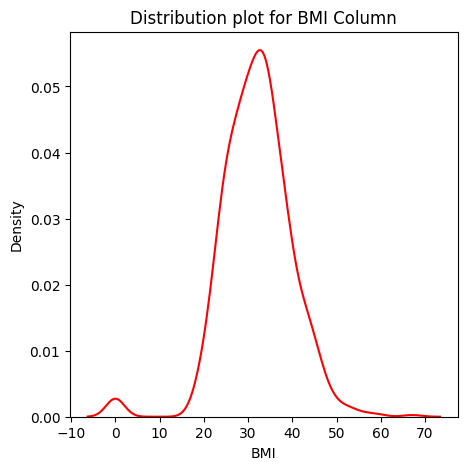

In [87]:
fig,ax=plt.subplots(figsize=(5,5))
sns.kdeplot(data=df['BMI'],ax=ax,color='r')
plt.title('Distribution plot for BMI Column')
plt.show()

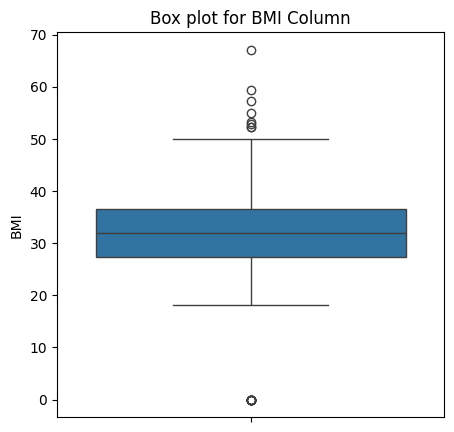

In [88]:
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(data=df['BMI'],ax=ax)
plt.title('Box plot for BMI Column')
plt.show()

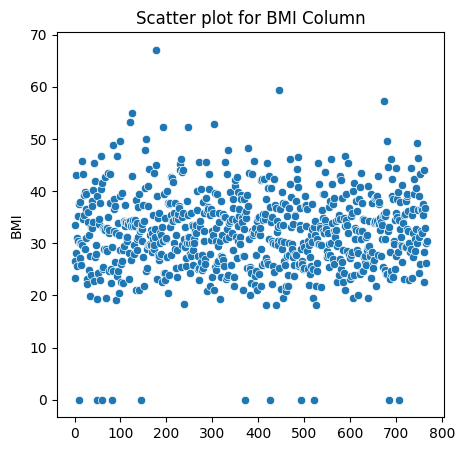

In [89]:
fig,ax=plt.subplots(figsize=(5,5))
sns.scatterplot(data=df['BMI'],ax=ax)
plt.title('Scatter plot for BMI Column')
plt.show()

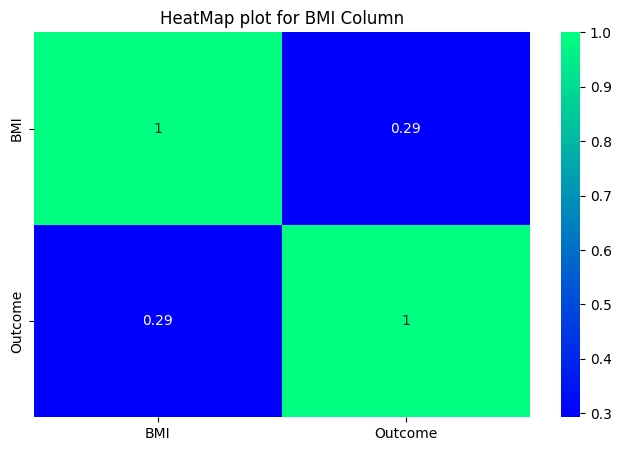

In [90]:
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(df[['BMI','Outcome']].corr(),annot=True,cmap='winter',ax=ax)
plt.title('HeatMap plot for BMI Column')
plt.show()

## DiabetesPedigreeFunction column:-

In [91]:
df['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [92]:
df['DiabetesPedigreeFunction'].isnull().sum()

0

In [93]:
df['DiabetesPedigreeFunction'].skew()

1.919911066307204

In [94]:
df['DiabetesPedigreeFunction'].var(ddof=0)

0.10963569693840876

In [95]:
df['DiabetesPedigreeFunction'].std(ddof=0)

0.3311128160286291

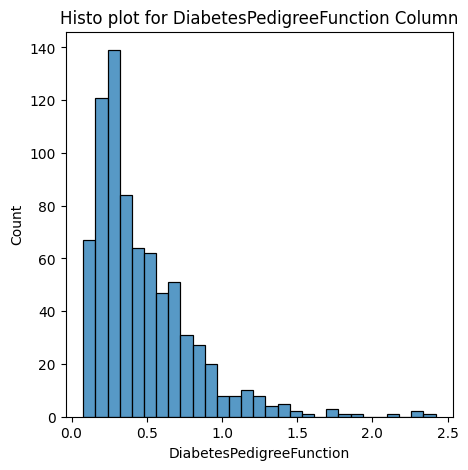

In [96]:
fig,ax=plt.subplots(figsize=(5,5))
sns.histplot(data=df['DiabetesPedigreeFunction'],ax=ax)
plt.title('Histo plot for DiabetesPedigreeFunction Column')
plt.show()

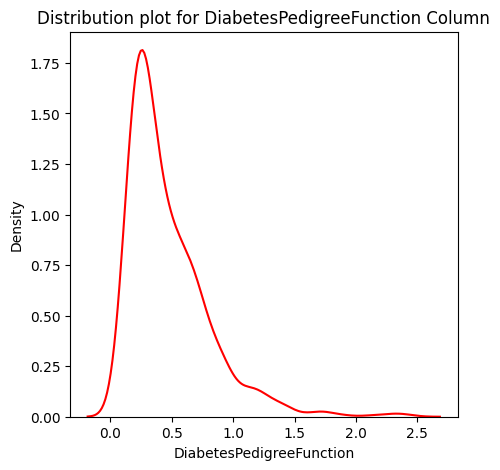

In [97]:
fig,ax=plt.subplots(figsize=(5,5))
sns.kdeplot(data=df['DiabetesPedigreeFunction'],ax=ax,color='r')
plt.title('Distribution plot for DiabetesPedigreeFunction Column')
plt.show()

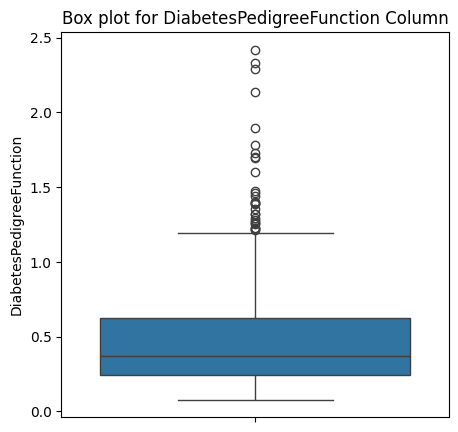

In [98]:
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(data=df['DiabetesPedigreeFunction'],ax=ax)
plt.title('Box plot for DiabetesPedigreeFunction Column')
plt.show()

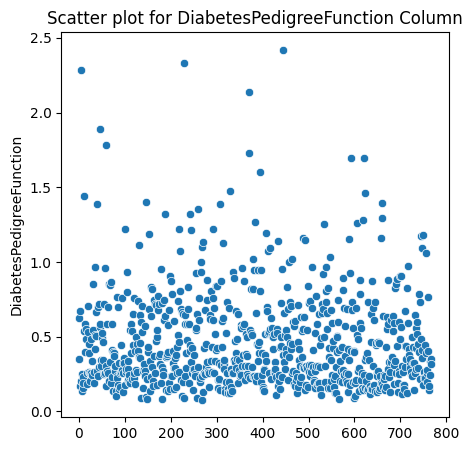

In [99]:
fig,ax=plt.subplots(figsize=(5,5))
sns.scatterplot(data=df['DiabetesPedigreeFunction'],ax=ax)
plt.title('Scatter plot for DiabetesPedigreeFunction Column')
plt.show()

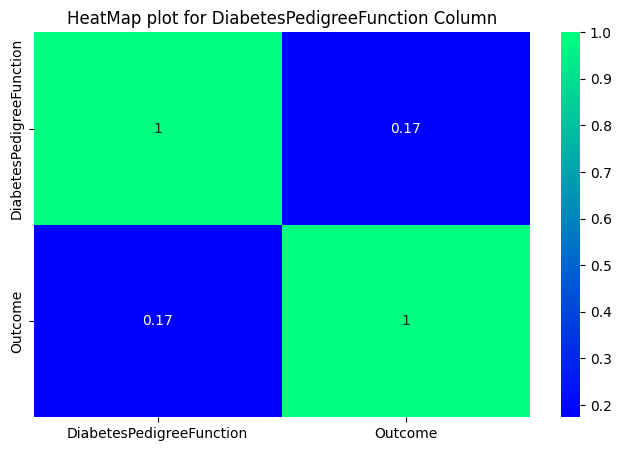

In [100]:
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(df[['DiabetesPedigreeFunction','Outcome']].corr(),annot=True,cmap='winter',ax=ax)
plt.title('HeatMap plot for DiabetesPedigreeFunction Column')
plt.show()

## Age Column:-

In [101]:
df['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [102]:
df['Age'].isnull().sum()

0

In [103]:
df['Age'].skew()

1.1295967011444805

In [104]:
df['Age'].var(ddof=0)

138.12296379937067

In [105]:
df['Age'].std(ddof=0)

11.752572645994181

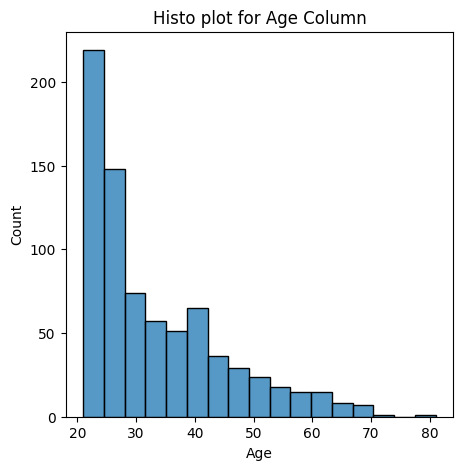

In [106]:
fig,ax=plt.subplots(figsize=(5,5))
sns.histplot(data=df['Age'],ax=ax)
plt.title('Histo plot for Age Column')
plt.show()

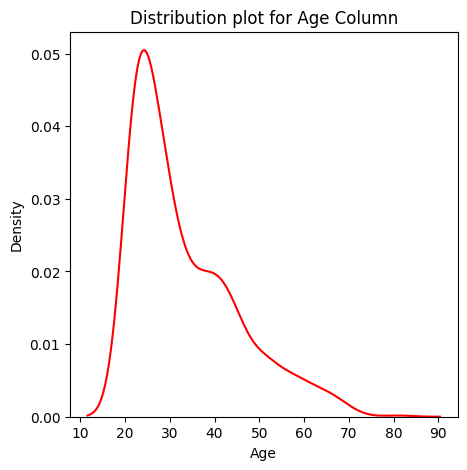

In [107]:
fig,ax=plt.subplots(figsize=(5,5))
sns.kdeplot(data=df['Age'],ax=ax,color='r')
plt.title('Distribution plot for Age Column')
plt.show()

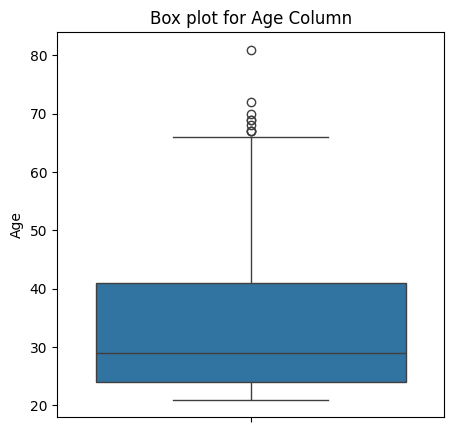

In [108]:
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(data=df['Age'],ax=ax)
plt.title('Box plot for Age Column')
plt.show()

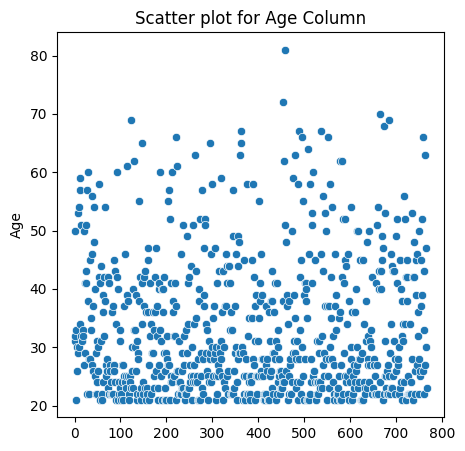

In [109]:
fig,ax=plt.subplots(figsize=(5,5))
sns.scatterplot(data=df['Age'],ax=ax)
plt.title('Scatter plot for Age Column')
plt.show()

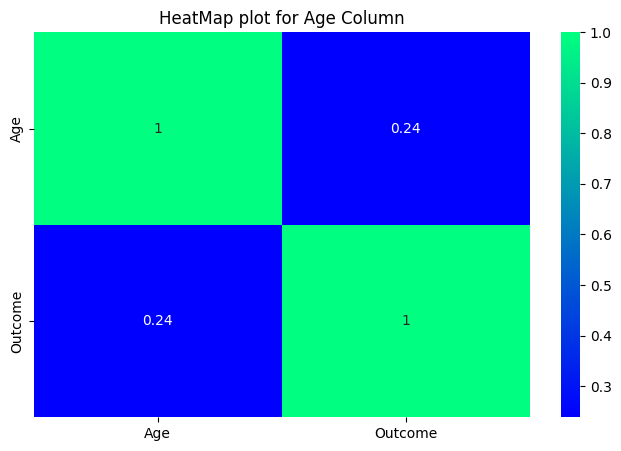

In [110]:
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(df[['Age','Outcome']].corr(),annot=True,cmap='winter',ax=ax)
plt.title('HeatMap plot for Age Column')
plt.show()

## Outcome Column:-

In [111]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [112]:
df['Outcome'].nunique()

2

In [113]:
df['Outcome'].isnull().sum()

0

In [114]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

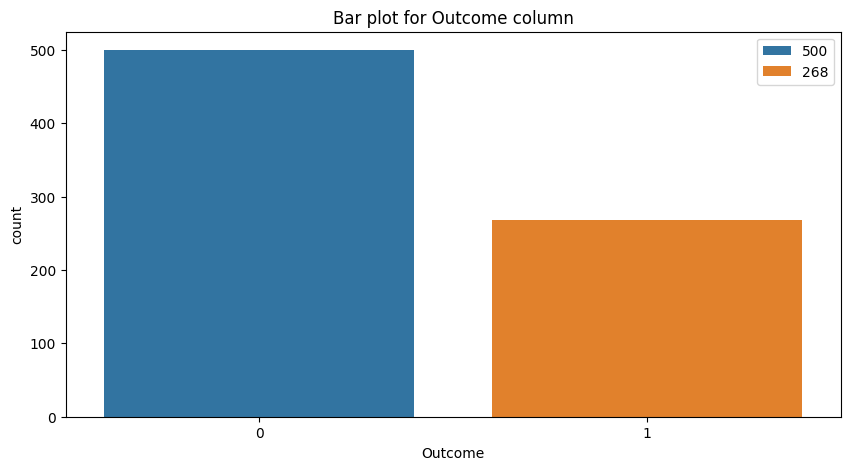

In [115]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=df['Outcome'],hue=df['Outcome'],ax=ax)
plt.title('Bar plot for Outcome column')
plt.legend(df['Outcome'].value_counts())
plt.show()

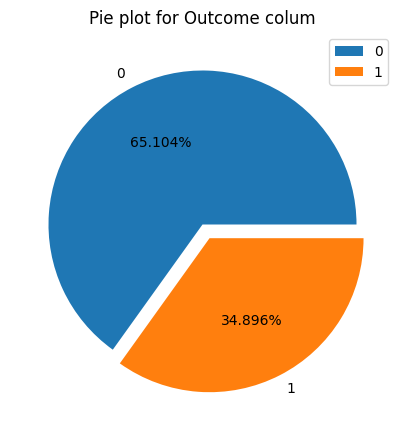

In [116]:
fig,ax=plt.subplots(figsize=(10,5))
plt.pie(x=(df['Outcome'].value_counts()),labels=sorted(df['Outcome'].unique()),autopct='%0.3f%%',explode=[0,0.1])
plt.title('Pie plot for Outcome colum')
plt.legend()
plt.show()

# Data Cleaning:-

In [117]:
df['Glucose'].replace(0,df['Glucose'].median(),inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].replace(0,df['SkinThickness'].median(),inplace=True)
df['BMI'].replace(0,df['BMI'].median(),inplace=True)

In [118]:
df['Glucose'].describe()

count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [119]:
df['BloodPressure'].describe()

count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [120]:
df['SkinThickness'].describe()

count    768.000000
mean      27.334635
std        9.229014
min        7.000000
25%       23.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [121]:
df['BMI'].describe()

count    768.000000
mean      32.450911
std        6.875366
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

# Glucose:-

In [122]:
class Glucose_IQR:

    try:

        Glucose_q1=df['Glucose'].quantile(q=0.25)
        Glucose_q2=df['Glucose'].quantile(q=0.50)
        Glucose_q3=df['Glucose'].quantile(q=0.75)

        Glucose_iqr=Glucose_q3-Glucose_q1

        Glucose_lower_limit=Glucose_q1-(1.5*Glucose_iqr)
        Glucose_upper_limit=Glucose_q3+(1.5*Glucose_iqr)

    except Exception as e:
        raise Exception(f'Error find in Glucose_IQR :\n'+str(e))

    def __init__(self,Glucose_q1,Glucose_q2,Glucose_q3,Glucose_iqr,Glucose_lower_limit,Glucose_upper_limit):

        try:

            self.Glucose_q1=Glucose_q1
            self.Glucose_q2=Glucose_q2
            self.Glucose_q3=Glucose_q3
            self.Glucose_iqr=Glucose_iqr
            self.Glucose_lower_limit=Glucose_lower_limit
            self.Glucose_upper_limit=Glucose_upper_limit

        except Exception as e:
            raise Exception(f'Error find in Glucose_IQR init level :\n'+str(e))
        
    try:

        def Glucose_column_q1(self):
            return self.Glucose_q1
        
        def Glucose_column_q2(self):
            return self.Glucose_q2
        
        def Glucose_column_q3(self):
            return self.Glucose_q3
        
        def Glucose_column_iqr(self):
            return self.Glucose_iqr
        
        def Glucose_column_lower_limit(self):
            return self.Glucose_lower_limit
        
        def Glucose_column_upper_limit(self):
            return self.Glucose_upper_limit
        
    except Exception as e:
        raise Exception(f'Error find in Glucose_IQR column level :\n'+str(e))

In [123]:
Glucose_IQR.Glucose_lower_limit

39.0

In [124]:
Glucose_IQR.Glucose_upper_limit

201.0

In [125]:
df[(df['Glucose']>Glucose_IQR.Glucose_upper_limit) | (df['Glucose']<Glucose_IQR.Glucose_lower_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [126]:
df['Glucose']=df['Glucose'].clip(lower=Glucose_IQR.Glucose_lower_limit, upper=Glucose_IQR.Glucose_upper_limit)

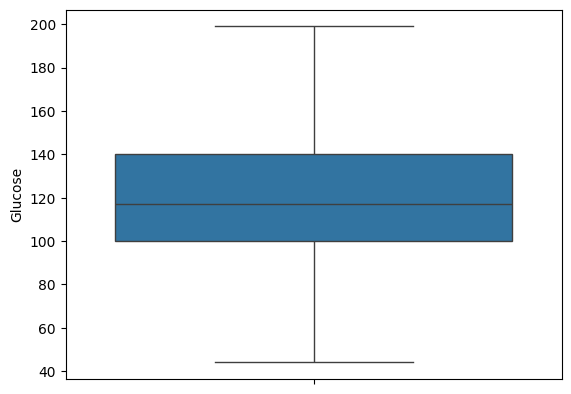

In [127]:
sns.boxplot(df['Glucose'])
plt.show()

# BloodPressure:-

In [128]:
class BloodPressure_IQR:

    try:

        BloodPressure_q1=df['BloodPressure'].quantile(q=0.25)
        BloodPressure_q2=df['BloodPressure'].quantile(q=0.50)
        BloodPressure_q3=df['BloodPressure'].quantile(q=0.75)

        BloodPressure_iqr=BloodPressure_q3-BloodPressure_q1

        BloodPressure_lower_level=BloodPressure_q1-(1.5*BloodPressure_iqr)
        BloodPressure_upper_level=BloodPressure_q3+(1.5*BloodPressure_iqr)

    except Exception as e:
        raise Exception(f'Error find in BloodPressure_IQR :\n'+str(e))

    def __init__(self,BloodPressure_q1,BloodPressure_q2,BloodPressure_q3,BloodPressure_iqr,BloodPressure_lower_level,BloodPressure_upper_level):

        try:

            self.BloodPressure_q1=BloodPressure_q1
            self.BloodPressure_q2=BloodPressure_q2
            self.BloodPressure_q3=BloodPressure_q3
            self.BloodPressure_iqr=BloodPressure_iqr
            self.BloodPressure_lower_level=BloodPressure_lower_level
            self.BloodPressure_upper_level=BloodPressure_upper_level

        except Exception as e:
            raise Exception(f'Error find in BloodPressure_IQR init level :\n'+str(e))
        
    try:

        def BloodPressure_column_q1(self):
            return self.BloodPressure_q1
        
        def BloodPressure_column_q2(self):
            return self.BloodPressure_q2
        
        def BloodPressure_column_q3(self):
            return self.BloodPressure_q3
        
        def BloodPressure_column_iqr(self):
            return self.BloodPressure_iqr
        
        def BloodPressure_column_lower_level(self):
            return self.BloodPressure_lower_level
        
        def BloodPressure_column_upper_level(self):
            return self.BloodPressure_upper_level
        
    except Exception as e:
        raise Exception(f'Error find in BloodPressure_IQR column level :\n'+str(e))

In [129]:
BloodPressure_IQR.BloodPressure_lower_level

40.0

In [130]:
BloodPressure_IQR.BloodPressure_upper_level

104.0

In [131]:
df[(df['BloodPressure']>BloodPressure_IQR.BloodPressure_upper_level) | (df['BloodPressure']<BloodPressure_IQR.BloodPressure_lower_level)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103,30,38,83,43.3,0.183,33,0
43,9,171,110,24,240,45.4,0.721,54,1
84,5,137,108,23,0,48.8,0.227,37,1
106,1,96,122,23,0,22.4,0.207,27,0
125,1,88,30,42,99,55.0,0.496,26,1
177,0,129,110,46,130,67.1,0.319,26,1
362,5,103,108,37,0,39.2,0.305,65,0
549,4,189,110,31,0,28.5,0.680,37,0
597,1,89,24,19,25,27.8,0.559,21,0
599,1,109,38,18,120,23.1,0.407,26,0


In [132]:
df['BloodPressure']=df['BloodPressure'].clip(lower=BloodPressure_IQR.BloodPressure_lower_level,upper=BloodPressure_IQR.BloodPressure_upper_level)

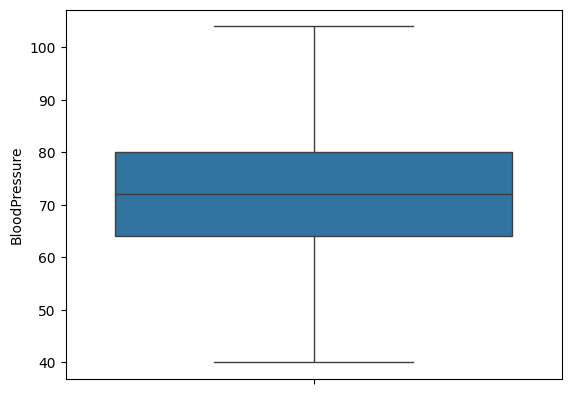

In [133]:
sns.boxplot(df['BloodPressure'])
plt.show()

# SkinThickness

In [134]:
class SkinThickness_IQR:

    try:

        SkinThickness_q1=df['SkinThickness'].quantile(0.25)
        SkinThickness_q2=df['SkinThickness'].quantile(0.50)
        SkinThickness_q3=df['SkinThickness'].quantile(0.75)

        SkinThickness_iqr=SkinThickness_q3-SkinThickness_q1

        SkinThickness_lower_limit=SkinThickness_q1-(1.5*SkinThickness_iqr)
        SkinThickness_upper_limit=SkinThickness_q3+(1.5*SkinThickness_iqr)

    except Exception as e:
        raise Exception(f'Error find in SkinThickness_IQR :\n'+str(e))
    

    def __init__(self,SkinThickness_q1,SkinThickness_q2,SkinThickness_q3,SkinThickness_iqr,SkinThickness_lower_limit,SkinThickness_upper_limit):

        try:

            self.SkinThickness_q1 = SkinThickness_q1
            self.SkinThickness_q2 = SkinThickness_q2
            self.SkinThickness_q3 = SkinThickness_q3
            self.SkinThickness_iqr = SkinThickness_iqr
            self.SkinThickness_lower_limit = SkinThickness_lower_limit
            self.SkinThickness_upper_limit= SkinThickness_upper_limit

        except Exception as e:
            raise Exception(f'Error find in SkinThickness_IQR init level :\n'+str(e))
        
        try:

            def SkinThickness_column_q1(self):
                return self.SkinThickness_q1
            
            def SkinThickness_column_q2(self):
                return self.SkinThickness_q2
            
            def SkinThickness_column_q3(self):
                return self.SkinThickness_q3
            
            def SkinThickness_column_iqr(self):
                return self.SkinThickness_iqr
            
            def SkinThickness_column_lower_limit(self):
                return self.SkinThickness_lower_limit
            
            def SkinThickness_column_upper_limit(self):
                return self.SkinThickness_upper_limit
            
        except Exception as e:
            raise Exception(f'Error find in SkinThickness_IQR column level :\n'+str(e))

In [135]:
SkinThickness_IQR.SkinThickness_lower_limit

9.5

In [136]:
SkinThickness_IQR.SkinThickness_upper_limit

45.5

In [137]:
df[(df['SkinThickness']>SkinThickness_IQR.SkinThickness_upper_limit) | (df['SkinThickness']<SkinThickness_IQR.SkinThickness_lower_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
16,0,118,84,47,230,45.8,0.551,31,1
39,4,111,72,47,207,37.1,1.390,56,1
57,0,100,88,60,110,46.8,0.962,31,0
86,13,106,72,54,0,36.6,0.178,45,0
99,1,122,90,51,220,49.7,0.325,31,1
120,0,162,76,56,100,53.2,0.759,25,1
150,1,136,74,50,204,37.4,0.399,24,0
177,0,129,104,46,130,67.1,0.319,26,1
211,0,147,85,54,0,42.8,0.375,24,0
254,12,92,62,7,258,27.6,0.926,44,1


In [138]:
df['SkinThickness']=df['SkinThickness'].clip(lower=SkinThickness_IQR.SkinThickness_lower_limit,upper=SkinThickness_IQR.SkinThickness_upper_limit)

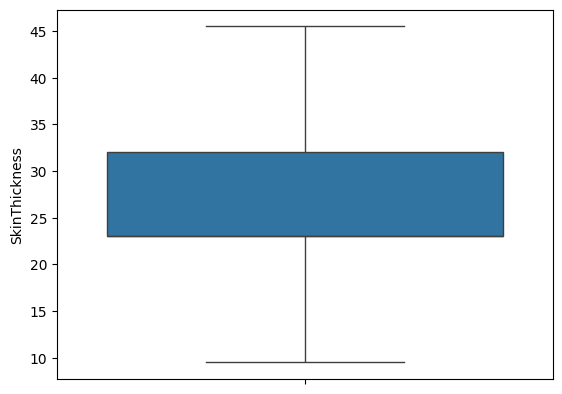

In [139]:
sns.boxplot(df['SkinThickness'])
plt.show()

# BMI:-

In [140]:
class BMI_IQR:

    try:

        BMI_q1=df['BMI'].quantile(q=0.25)
        BMI_q2=df['BMI'].quantile(q=0.50)
        BMI_q3=df['BMI'].quantile(q=0.75)

        BMI_iqr=BMI_q3-BMI_q1

        BMI_lower_limit=BMI_q1-(1.5*BMI_iqr)
        BMI_upper_limit=BMI_q3+(1.5*BMI_iqr)

    except Exception as e:
        raise Exception(f'Error find in BMI_IQR :\n'+str(e))
    

    def __init__(self,BMI_q1,BMI_q2,BMI_q3,BMI_iqr,BMI_lower_limit,BMI_upper_limit):

        try:

            self.BMI_q1=BMI_q1
            self.BMI_q2=BMI_q2
            self.BMI_q3=BMI_q3
            self.BMI_iqr=BMI_iqr
            self.BMI_lower_limit=BMI_lower_limit
            self.BMI_upper_limit=BMI_upper_limit

        except Exception as e:
            raise Exception(f'Error find in BMI_IQR init level :\n'+str(e))
        
    try:

    
        def BMI_column_q1(self):
            return self.BMI_q1
        
        def BMI_column_q2(self):
            return self.BMI_q2
        
        def BMI_column_q3(self):
            return self.BMI_q3
        
        def BMI_column_iqr(self):
            return self.BMI_iqr
        
        def BMI_column_lower_limit(self):
            return self.BMI_lower_limit
        
        def BMI_column_upper_limit(self):
            return self.BMI_upper_limit
        
    except Exception as e:
        raise Exception(f'Error find in BMI_IQR column level :\n'+str(e))

In [141]:
BMI_IQR.BMI_lower_limit

13.849999999999998

In [142]:
BMI_IQR.BMI_upper_limit

50.25

In [143]:
df[(df['BMI']>BMI_IQR.BMI_upper_limit) | (df['BMI']<BMI_IQR.BMI_lower_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162,76,45.5,100,53.2,0.759,25,1
125,1,88,40,42.0,99,55.0,0.496,26,1
177,0,129,104,45.5,130,67.1,0.319,26,1
193,11,135,72,23.0,0,52.3,0.578,40,1
247,0,165,90,33.0,680,52.3,0.427,23,0
303,5,115,98,23.0,0,52.9,0.209,28,1
445,0,180,78,45.5,14,59.4,2.420,25,1
673,3,123,100,35.0,240,57.3,0.880,22,0


In [144]:
df['BMI']=df['BMI'].clip(lower=BMI_IQR.BMI_lower_limit,upper=BMI_IQR.BMI_upper_limit)

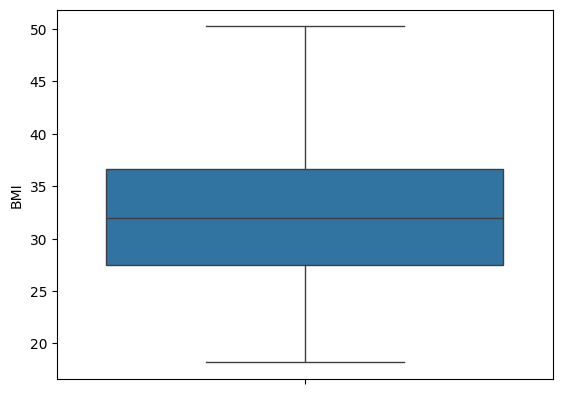

In [145]:
sns.boxplot(df['BMI'])
plt.show()

In [146]:
class Pregnancies_IQR:

    try:

        Pregnancies_q1=df['Pregnancies'].quantile(q=0.25)
        Pregnancies_q2=df['Pregnancies'].quantile(q=0.50)
        Pregnancies_q3=df['Pregnancies'].quantile(q=0.75)

        Pregnancies_iqr=Pregnancies_q3-Pregnancies_q1

        Pregnancies_lower_limit=Pregnancies_q1-(1.5*Pregnancies_iqr)
        Pregnancies_upper_limit=Pregnancies_q3+(1.5*Pregnancies_iqr)

    except Exception as e:
        raise Exception(f'Error find in Pregnancies_IQR :\n'+str(e))
    

    def __init__(self,Pregnancies_q1,Pregnancies_q2,Pregnancies_q3,Pregnancies_iqr,Pregnancies_lower_limit,Pregnancies_upper_limit):

        try:

            self.Pregnancies_q1=Pregnancies_q1
            self.Pregnancies_q2=Pregnancies_q2
            self.Pregnancies_q3=Pregnancies_q3
            self.Pregnancies_iqr=Pregnancies_iqr
            self.Pregnancies_lower_limit=Pregnancies_lower_limit
            self.Pregnancies_upper_limit=Pregnancies_upper_limit

        except Exception as e:
            raise Exception(f'Error find in Pregnancies_IQR init level :\n'+str(e))
        
    try:

        def Pregnancies_column_q1(self):
            return self.Pregnancies_q1
        
        def Pregnancies_column_q2(self):
            return self.Pregnancies_q2
        
        def Pregnancies_column_q3(self):
            return self.Pregnancies_q3
        
        def Pregnancies_column_iqr(self):
            return self.Pregnancies_iqr
        
        def Pregnancies_column_lower_limit(self):
            return self.Pregnancies_lower_limit
        
        def Pregnancies_column_upper_limit(self):
            return self.Pregnancies_upper_limit
        
    except Exception as e:
        raise Exception(f'Error find in Pregnancies_IQR column level :\n'+str(e))

In [147]:
Pregnancies_IQR.Pregnancies_lower_limit

-6.5

In [148]:
Pregnancies_IQR.Pregnancies_upper_limit

13.5

In [149]:
df[(df['Pregnancies']>Pregnancies_IQR.Pregnancies_upper_limit) | (df['Pregnancies']<Pregnancies_IQR.Pregnancies_lower_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32.0,110,37.1,0.153,43,1
159,17,163,72,41.0,114,40.9,0.817,47,1
298,14,100,78,25.0,184,36.6,0.412,46,1
455,14,175,62,30.0,0,33.6,0.212,38,1


In [150]:
df['Pregnancies']=df['Pregnancies'].clip(lower=Pregnancies_IQR.Pregnancies_lower_limit,upper=Pregnancies_IQR.Pregnancies_upper_limit)

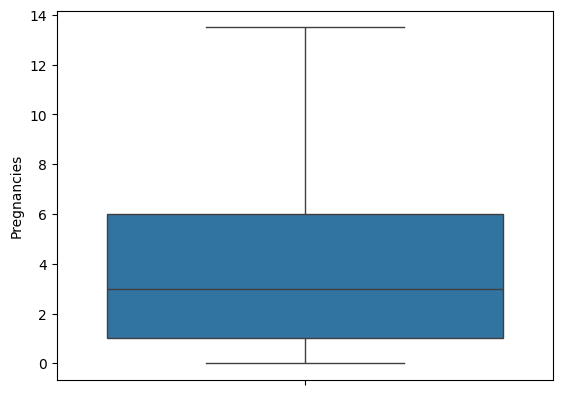

In [151]:
sns.boxplot(df['Pregnancies'])
plt.show()

# Insulin:-

In [152]:
class Insulin_IQR:

    try:

        Insulin_q1=df['Insulin'].quantile(q=0.25)
        Insulin_q2=df['Insulin'].quantile(q=0.50)
        Insulin_q3=df['Insulin'].quantile(q=0.75)
        
        Insulin_iqr=Insulin_q3-Insulin_q1

        Insulin_lower_limit=Insulin_q1-(1.5*Insulin_iqr)
        Insulin_upper_limit=Insulin_q3+(1.5*Insulin_iqr)

    except Exception as e:
        raise Exception(f'Error find in Insulin_IQR :\n'+str(e))

    def __init__(self,Insulin_q1,Insulin_q2,Insulin_q3,Insulin_iqr,Insulin_lower_limit,Insulin_upper_limit):

        try:

            self.Insulin_q1=Insulin_q1
            self.Insulin_q2=Insulin_q2
            self.Insulin_q3=Insulin_q3
            self.Insulin_iqr=Insulin_iqr
            self.Insulin_lower_limit=Insulin_lower_limit
            self.Insulin_upper_limit=Insulin_upper_limit

        except Exception as e:
            raise Exception(f'Error find in Insulin_IQR init level :\n'+str(e))
        
    try:

    
        def Insulin_column_q1(self):
            return self.Insulin_q1
        
        def Insulin_column_q2(self):
            return self.Insulin_q2
        
        def Insulin_column_q3(self):
            return self.Insulin_q3
        
        def Insulin_column_iqr(self):
            return self.Insulin_iqr
        
        def Insulin_column_lower_limit(self):
            return self.Insulin_lower_limit
        
        def Insulin_column_upper_limit(self):
            return self.Insulin_upper_limit
        
    except Exception as e:
        raise Exception(f'Error find in Insulin_IQR column level :\n'+str(e))

In [153]:
Insulin_IQR.Insulin_lower_limit

-190.875

In [154]:
Insulin_IQR.Insulin_upper_limit

318.125

In [155]:
df[(df['Insulin']>Insulin_IQR.Insulin_upper_limit) | (df['Insulin']<Insulin_IQR.Insulin_lower_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2.0,197,70,45.0,543,30.50,0.158,53,1
13,1.0,189,60,23.0,846,30.10,0.398,59,1
54,7.0,150,66,42.0,342,34.70,0.718,42,0
111,8.0,155,62,26.0,495,34.00,0.543,46,1
139,5.0,105,72,29.0,325,36.90,0.159,28,0
153,1.0,153,82,42.0,485,40.60,0.687,23,0
186,8.0,181,68,36.0,495,30.10,0.615,60,1
220,0.0,177,60,29.0,478,34.60,1.072,21,1
228,4.0,197,70,39.0,744,36.70,2.329,31,0
231,6.0,134,80,37.0,370,46.20,0.238,46,1


In [156]:
df['Insulin']=df['Insulin'].clip(lower=Insulin_IQR.Insulin_lower_limit,upper=Insulin_IQR.Insulin_upper_limit)

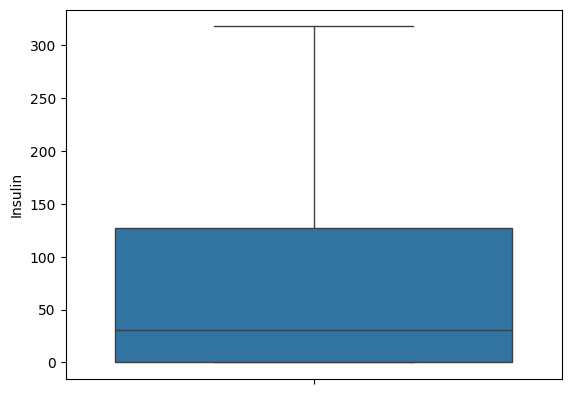

In [157]:
sns.boxplot(df['Insulin'])
plt.show()

# DiabetesPedigreeFunction:-

In [158]:
class DiabetesPedigreeFunction_IQR:

    try:

        DiabetesPedigreeFunction_q1=df['DiabetesPedigreeFunction'].quantile(q=0.25)
        DiabetesPedigreeFunction_q2=df['DiabetesPedigreeFunction'].quantile(q=0.50)
        DiabetesPedigreeFunction_q3=df['DiabetesPedigreeFunction'].quantile(q=0.75)

        DiabetesPedigreeFunction_iqr=DiabetesPedigreeFunction_q3-DiabetesPedigreeFunction_q1

        DiabetesPedigreeFunction_lower_limit=DiabetesPedigreeFunction_q1-(1.5*DiabetesPedigreeFunction_iqr)
        DiabetesPedigreeFunction_upper_limit=DiabetesPedigreeFunction_q3+(1.5*DiabetesPedigreeFunction_iqr)

    except Exception as e:
        raise Exception(f'Error find in DiabetesPedigreeFunction_IQR :\n'+str(e))
    

    def __init__(self,DiabetesPedigreeFunction_q1,DiabetesPedigreeFunction_q2,DiabetesPedigreeFunction_q3,DiabetesPedigreeFunction_iqr,DiabetesPedigreeFunction_lower_limit,DiabetesPedigreeFunction_upper_limit):

        try:

            self.DiabetesPedigreeFunction_q1=DiabetesPedigreeFunction_q1
            self.DiabetesPedigreeFunction_q2=DiabetesPedigreeFunction_q2
            self.DiabetesPedigreeFunction_q3=DiabetesPedigreeFunction_q3
            self.DiabetesPedigreeFunction_iqr=DiabetesPedigreeFunction_iqr
            self.DiabetesPedigreeFunction_lower_limit=DiabetesPedigreeFunction_lower_limit
            self.DiabetesPedigreeFunction_upper_limit=DiabetesPedigreeFunction_upper_limit

        except Exception as e:
            raise Exception(f'Error find in DiabetesPedigreeFunction_IQR init level :\n'+str(e))
        
    try:

        def DiabetesPedigreeFunction_column_q1(self):
            return self.DiabetesPedigreeFunction_q1
        
        def DiabetesPedigreeFunction_column_q2(self):
            return self.DiabetesPedigreeFunction_q2
        
        def DiabetesPedigreeFunction_column_q3(self):
            return self.DiabetesPedigreeFunction_q3
        
        def DiabetesPedigreeFunction_column_iqr(self):
            return self.DiabetesPedigreeFunction_iqr
        
        def DiabetesPedigreeFunction_column_lower_limit(self):
            return self.DiabetesPedigreeFunction_lower_limit
        
        def DiabetesPedigreeFunction_column_upper_limit(self):
            return self.DiabetesPedigreeFunction_upper_limit
        
    except Exception as e:
        raise Exception(f'Error find in DiabetesPedigreeFunction_IQR column level :\n'+str(e))

In [159]:
DiabetesPedigreeFunction_IQR.DiabetesPedigreeFunction_lower_limit

-0.32999999999999996

In [160]:
DiabetesPedigreeFunction_IQR.DiabetesPedigreeFunction_upper_limit

1.2

In [161]:
df[(df['DiabetesPedigreeFunction']>DiabetesPedigreeFunction_IQR.DiabetesPedigreeFunction_upper_limit) | (df['DiabetesPedigreeFunction']<DiabetesPedigreeFunction_IQR.DiabetesPedigreeFunction_lower_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0.0,137,40,35.0,168.000,43.10,2.288,33,1
12,10.0,139,80,23.0,0.000,27.10,1.441,57,0
39,4.0,111,72,45.5,207.000,37.10,1.390,56,1
45,0.0,180,66,39.0,0.000,42.00,1.893,25,1
58,0.0,146,82,23.0,0.000,40.50,1.781,44,0
100,1.0,163,72,23.0,0.000,39.00,1.222,33,1
147,2.0,106,64,35.0,119.000,30.50,1.400,34,0
187,1.0,128,98,41.0,58.000,32.00,1.321,33,1
218,5.0,85,74,22.0,0.000,29.00,1.224,32,1
228,4.0,197,70,39.0,318.125,36.70,2.329,31,0


In [162]:
df['DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction'].clip(lower=DiabetesPedigreeFunction_IQR.DiabetesPedigreeFunction_lower_limit,upper=DiabetesPedigreeFunction_IQR.DiabetesPedigreeFunction_upper_limit)

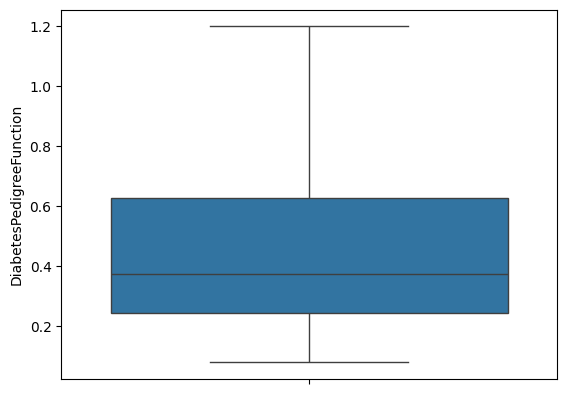

In [163]:
sns.boxplot(df['DiabetesPedigreeFunction'])
plt.show()

# Age:-

In [164]:
class Age_IQR:

    try:

        Age_q1=df['Age'].quantile(q=0.25)
        Age_q2=df['Age'].quantile(q=0.50)
        Age_q3=df['Age'].quantile(q=0.75)
        
        Age_iqr=Age_q3-Age_q1

        Age_lower_limit=Age_q1-(1.5*Age_iqr)
        Age_upper_limit=Age_q3+(1.5*Age_iqr)

    except Exception as e:
        raise Exception(f'Error find in Age_IQR :\n'+str(e))
    

    def __init__(self,Age_q1,Age_q2,Age_q3,Age_iqr,Age_lower_limit,Age_upper_limit):

        try:

            self.Age_q1=Age_q1
            self.Age_q2=Age_q2
            self.Age_q3=Age_q3
            self.Age_iqr=Age_iqr
            self.Age_lower_limit=Age_lower_limit
            self.Age_upper_limit=Age_upper_limit

        except Exception as e:
            raise Exception(f'Error find in Age_IQR init level :\n'+str(e))
        
    try:

        def Age_column_q1(self):
            return self.Age_q1
        
        def Age_column_q2(self):
            return self.Age_q2
        
        def Age_column_q3(self):
            return self.Age_q3
        
        def Age_column_iqr(self):
            return self.Age_iqr
        
        def Age_column_lower_limit(self):
            return self.Age_lower_limit
        
        def Age_column_upper_limit(self):
            return self.Age_upper_limit
        
    except Exception as e:
        raise Exception(f'Error find in Age_IQR column level :\n'+str(e))

In [165]:
Age_IQR.Age_lower_limit

-1.5

In [166]:
Age_IQR.Age_upper_limit

66.5

In [167]:
df[(df['Age']>Age_IQR.Age_upper_limit) | (df['Age']<Age_IQR.Age_lower_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5.0,132,80,23.0,0.0,26.8,0.186,69,0
363,4.0,146,78,23.0,0.0,38.5,0.520,67,1
453,2.0,119,72,23.0,0.0,19.6,0.832,72,0
459,9.0,134,74,33.0,60.0,25.9,0.460,81,0
489,8.0,194,80,23.0,0.0,26.1,0.551,67,0
537,0.0,57,60,23.0,0.0,21.7,0.735,67,0
666,4.0,145,82,18.0,0.0,32.5,0.235,70,1
674,8.0,91,82,23.0,0.0,35.6,0.587,68,0
684,5.0,136,82,23.0,0.0,32.0,0.640,69,0


In [168]:
df['Age']=df['Age'].clip(lower=Age_IQR.Age_lower_limit,upper=Age_IQR.Age_upper_limit)

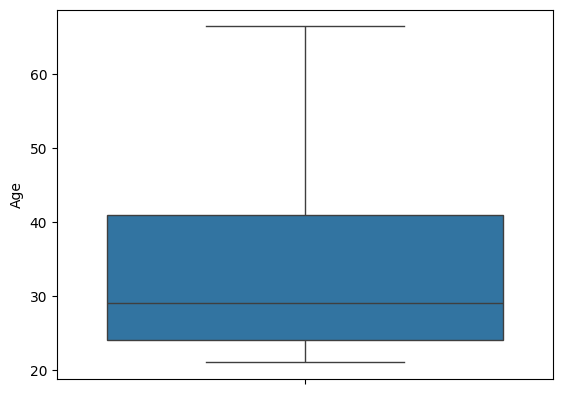

In [169]:
sns.boxplot(df['Age'])
plt.show()

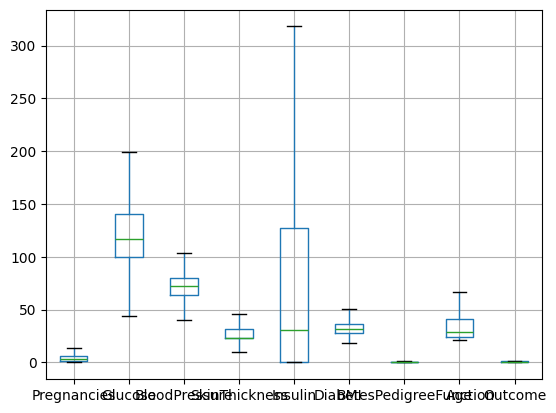

In [170]:
df.boxplot()
plt.show()

In [171]:
df['Age'].describe()

count    768.000000
mean      33.199870
std       11.628404
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       66.500000
Name: Age, dtype: float64

# Data Wrangling:-

## Discretization:-

In [172]:
df['Age_category']=pd.cut(df['Age'],bins=[0,12,19,30,60,90],labels=['kids','teen_age','young_age','midle_age','senior_citizen'])

In [173]:
df[['Age','Age_category']]

,Age,Age_category
0,50.0,midle_age
1,31.0,midle_age
2,32.0,midle_age
3,21.0,young_age
4,33.0,midle_age
...,...,...
763,63.0,senior_citizen
764,27.0,young_age
765,30.0,young_age
766,47.0,midle_age


In [174]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_category
0,6.0,148,72,35.0,0.0,33.6,0.627,50.0,1,midle_age
1,1.0,85,66,29.0,0.0,26.6,0.351,31.0,0,midle_age
2,8.0,183,64,23.0,0.0,23.3,0.672,32.0,1,midle_age
3,1.0,89,66,23.0,94.0,28.1,0.167,21.0,0,young_age
4,0.0,137,40,35.0,168.0,43.1,1.200,33.0,1,midle_age


## Data Transformation:-

In [175]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age_category'],
      dtype='object')

In [176]:
df['Pregnancies'].skew()

0.8539617478323778

In [177]:
df['Pregnancies_root']=df['Pregnancies']**(1/1.791)
df['Pregnancies_root'].skew()

0.000819585433181363

In [178]:
df['Glucose'].skew()

0.5355873034111183

In [179]:
df['Glucose_root']=df['Glucose']**(1/9.99)
df['Glucose_root'].skew()

0.00289368308278003

In [180]:
df['BloodPressure'].skew()

0.10566506007005463

In [181]:
df['BloodPressure_root']=df['BloodPressure']**(1/1.238)
df['BloodPressure_root'].skew()

0.0010584872214757554

In [182]:
df['SkinThickness'].skew()

0.4976649539471738

In [183]:
df['SkinThickness_root']=df['SkinThickness']**(1/2.679)
df['SkinThickness_root'].skew()

0.0013827767980590226

In [184]:
df['Insulin'].skew()

1.1738981213083215

In [185]:
df['Insulin_root']=df['Insulin']**(1/6.72)
df['Insulin_root'].skew()

0.00016690476513275847

In [186]:
df['BMI'].skew()

0.3517930345901584

In [187]:
df['BMI_root']=df['BMI']**(1/3.29)
df['BMI_root'].skew()

0.0003702468014699894

In [188]:
df['DiabetesPedigreeFunction'].skew()

1.0244278033317116

In [189]:
df['DiabetesPedigreeFunction_root']=df['DiabetesPedigreeFunction']**(1/38)
df['DiabetesPedigreeFunction_root'].skew()

0.00019225079340542435

In [190]:
df['Age'].skew()

1.0671703233262797

In [191]:
df['Age_box'],param=boxcox(df['Age'])
df['Age_box'].skew()

0.14574742105735933

In [192]:
param

-1.0818243919482537

In [193]:
df['Outcome'].skew()

0.635016643444986

## Feature Encoding:-

In [194]:
df['Age_category1']=df['Age_category'].map({'kids':0,'teen_age':1,'young_age':2,'midle_age':3,'senior_citizen':4})

In [195]:
df['Age_category1']

0      3
1      3
2      3
3      2
4      3
      ..
763    4
764    2
765    2
766    3
767    2
Name: Age_category1, Length: 768, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

## Feature Scasling:-

In [196]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_category,Pregnancies_root,Glucose_root,BloodPressure_root,SkinThickness_root,Insulin_root,BMI_root,DiabetesPedigreeFunction_root,Age_box,Age_category1
0,6.0,148,72,35.0,0.0,33.6,0.627,50.0,1,midle_age,2.719435,1.649086,31.642339,3.770161,0.000000,2.910268,0.987791,0.910941,3
1,1.0,85,66,29.0,0.0,26.6,0.351,31.0,0,midle_age,1.000000,1.560037,29.494749,3.514589,0.000000,2.710783,0.972824,0.901850,3
2,8.0,183,64,23.0,0.0,23.3,0.672,32.0,1,midle_age,3.193286,1.684502,28.770665,3.223273,0.000000,2.603812,0.989594,0.902611,3
3,1.0,89,66,23.0,94.0,28.1,0.167,21.0,0,young_age,1.000000,1.567235,29.494749,3.223273,1.966166,2.756362,0.953993,0.890053,2
4,0.0,137,40,35.0,168.0,43.1,1.200,33.0,1,midle_age,0.000000,1.636387,19.682084,3.770161,2.143617,3.139074,1.004809,0.903323,3


In [197]:
X=df.iloc[:,[10,11,12,13,14,15,16,17]]
y=df['Outcome']

In [198]:
X

,Pregnancies_root,Glucose_root,BloodPressure_root,SkinThickness_root,Insulin_root,BMI_root,DiabetesPedigreeFunction_root,Age_box
0,2.719435,1.649086,31.642339,3.770161,0.000000,2.910268,0.987791,0.910941
1,1.000000,1.560037,29.494749,3.514589,0.000000,2.710783,0.972824,0.901850
2,3.193286,1.684502,28.770665,3.223273,0.000000,2.603812,0.989594,0.902611
3,1.000000,1.567235,29.494749,3.223273,1.966166,2.756362,0.953993,0.890053
4,0.000000,1.636387,19.682084,3.770161,2.143617,3.139074,1.004809,0.903323
...,...,...,...,...,...,...,...,...
763,3.616990,1.587204,33.054876,4.158071,2.165739,2.891704,0.954587,0.913911
764,1.472581,1.617502,30.930443,3.422081,0.000000,2.991862,0.972009,0.898221
765,2.456224,1.616170,31.642339,3.223273,2.018102,2.698327,0.963664,0.901038
766,1.000000,1.622734,27.309237,3.223273,0.000000,2.814572,0.972678,0.910012


In [199]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [200]:
X_sc=StandardScaler()
X_scale=X_sc.fit_transform(X)

In [201]:
X_scale

array([[ 0.76458215,  0.90770402, -0.01490341, ...,  0.25088463,
         0.79941006,  1.36687772],
       [-0.75161486, -1.30453524, -0.53195017, ..., -0.85649766,
        -0.13344507,  0.12700917],
       [ 1.18242423,  1.78753652, -0.70627816, ..., -1.45031289,
         0.91181375,  0.23068399],
       ...,
       [ 0.53248319,  0.08996133, -0.01490341, ..., -0.92564118,
        -0.70443252,  0.01613027],
       [-0.75161486,  0.25302891, -1.05812664, ..., -0.28034358,
        -0.1425626 ,  1.24013498],
       [-0.75161486, -0.95400775, -0.18629711, ..., -0.23317437,
        -0.30587405, -1.04336359]])

In [202]:
vif=pd.DataFrame()

In [203]:
vif['VIF']=[variance_inflation_factor(X_scale,i) for i in range(X_scale.shape[1])]
vif['Features']=X.columns

In [204]:
vif

,VIF,Features
0,1.559498,Pregnancies_root
1,1.164705,Glucose_root
2,1.257811,BloodPressure_root
3,1.529227,SkinThickness_root
4,1.164797,Insulin_root
5,1.612823,BMI_root
6,1.073477,DiabetesPedigreeFunction_root
7,1.830867,Age_box


# Embedded method for feature selection:-

## Decision Tree:-

In [205]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [206]:
X_train_dt,X_test_dt,y_train_dt,y_test_dt=train_test_split(X_scale,y,test_size=0.20,random_state=64)

In [207]:
d_model=DecisionTreeClassifier()

In [208]:
decision_train_random=[]
decision_test_ramdom=[]

for i in range(0,100):

    X_train_dt,X_test_dt,y_train_dt,y_test_dt=train_test_split(X_scale,y,test_size=0.20,random_state=i)

    deci_model=DecisionTreeClassifier()
    deci_model.fit(X_train_dt,y_train_dt)
    y_pred_train=deci_model.predict(X_train_dt)
    y_pred_test=deci_model.predict(X_test_dt)
    decision_train_random.append(accuracy_score(y_train_dt,y_pred_train))
    decision_test_ramdom.append(accuracy_score(y_test_dt,y_pred_test))

In [209]:
np.argmax(decision_test_ramdom)

7

In [210]:
for r in range(0,10):
    dec_modl=DecisionTreeClassifier()
    X_train_dt,X_test_dt,y_train_dt,y_test_dt=train_test_split(X_scale,y,test_size=0.20,random_state=r)
    param={'criterion':['gini','entropy', 'log_loss'], 'max_depth':[1,2,3,4,5]}
    d_gcv=GridSearchCV(dec_modl,param_grid=param,cv=5,verbose=5)
    d_gcv.fit(X_train_dt,y_train_dt)
    best_param=d_gcv.best_params_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .......criterion=gini, max_depth=1;, score=0.691 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=1;, score=0.764 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=1;, score=0.602 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=1;, score=0.724 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=1;, score=0.721 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.691 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.724 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.780 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.691 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.746 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.659 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=3;

In [211]:
best_param

{'criterion': 'gini', 'max_depth': 3}

In [212]:
decision_train_random=[]
decision_test_ramdom=[]

for i in range(0,100):

    X_train_dt,X_test_dt,y_train_dt,y_test_dt=train_test_split(X_scale,y,test_size=0.20,random_state=i)

    deci_model=DecisionTreeClassifier(criterion= 'log_loss',max_depth= 4)
    deci_model.fit(X_train_dt,y_train_dt)
    y_pred_train=deci_model.predict(X_train_dt)
    y_pred_test=deci_model.predict(X_test_dt)
    decision_train_random.append(accuracy_score(y_train_dt,y_pred_train))
    decision_test_ramdom.append(accuracy_score(y_test_dt,y_pred_test))

In [213]:
np.argmax(decision_test_ramdom)

26

In [214]:
X_train_dt,X_test_dt,y_train_dt,y_test_dt=train_test_split(X_scale,y,test_size=0.20,random_state=0)

decision_model=DecisionTreeClassifier(criterion= 'log_loss',max_depth= 4)
decision_model.fit(X_train_dt,y_train_dt)
y_pred_train=decision_model.predict(X_train_dt)
y_pred_test=decision_model.predict(X_test_dt)
accuracy_train=accuracy_score(y_pred_train,y_train_dt)
accuracy_test=accuracy_score(y_pred_test,y_test_dt)
cross_val=cross_val_score(decision_model,X_scale,y,cv=5).mean()
con_mat=confusion_matrix(y_test_dt,y_pred_test)
feature_imp=decision_model.feature_importances_

In [215]:
feature_imp

array([0.        , 0.49687952, 0.        , 0.03154562, 0.        ,
       0.28003094, 0.0112079 , 0.18033602])

In [216]:
accuracy_test

0.7597402597402597

In [217]:
accuracy_train

0.7654723127035831

In [218]:
cross_val

0.7070452423393601

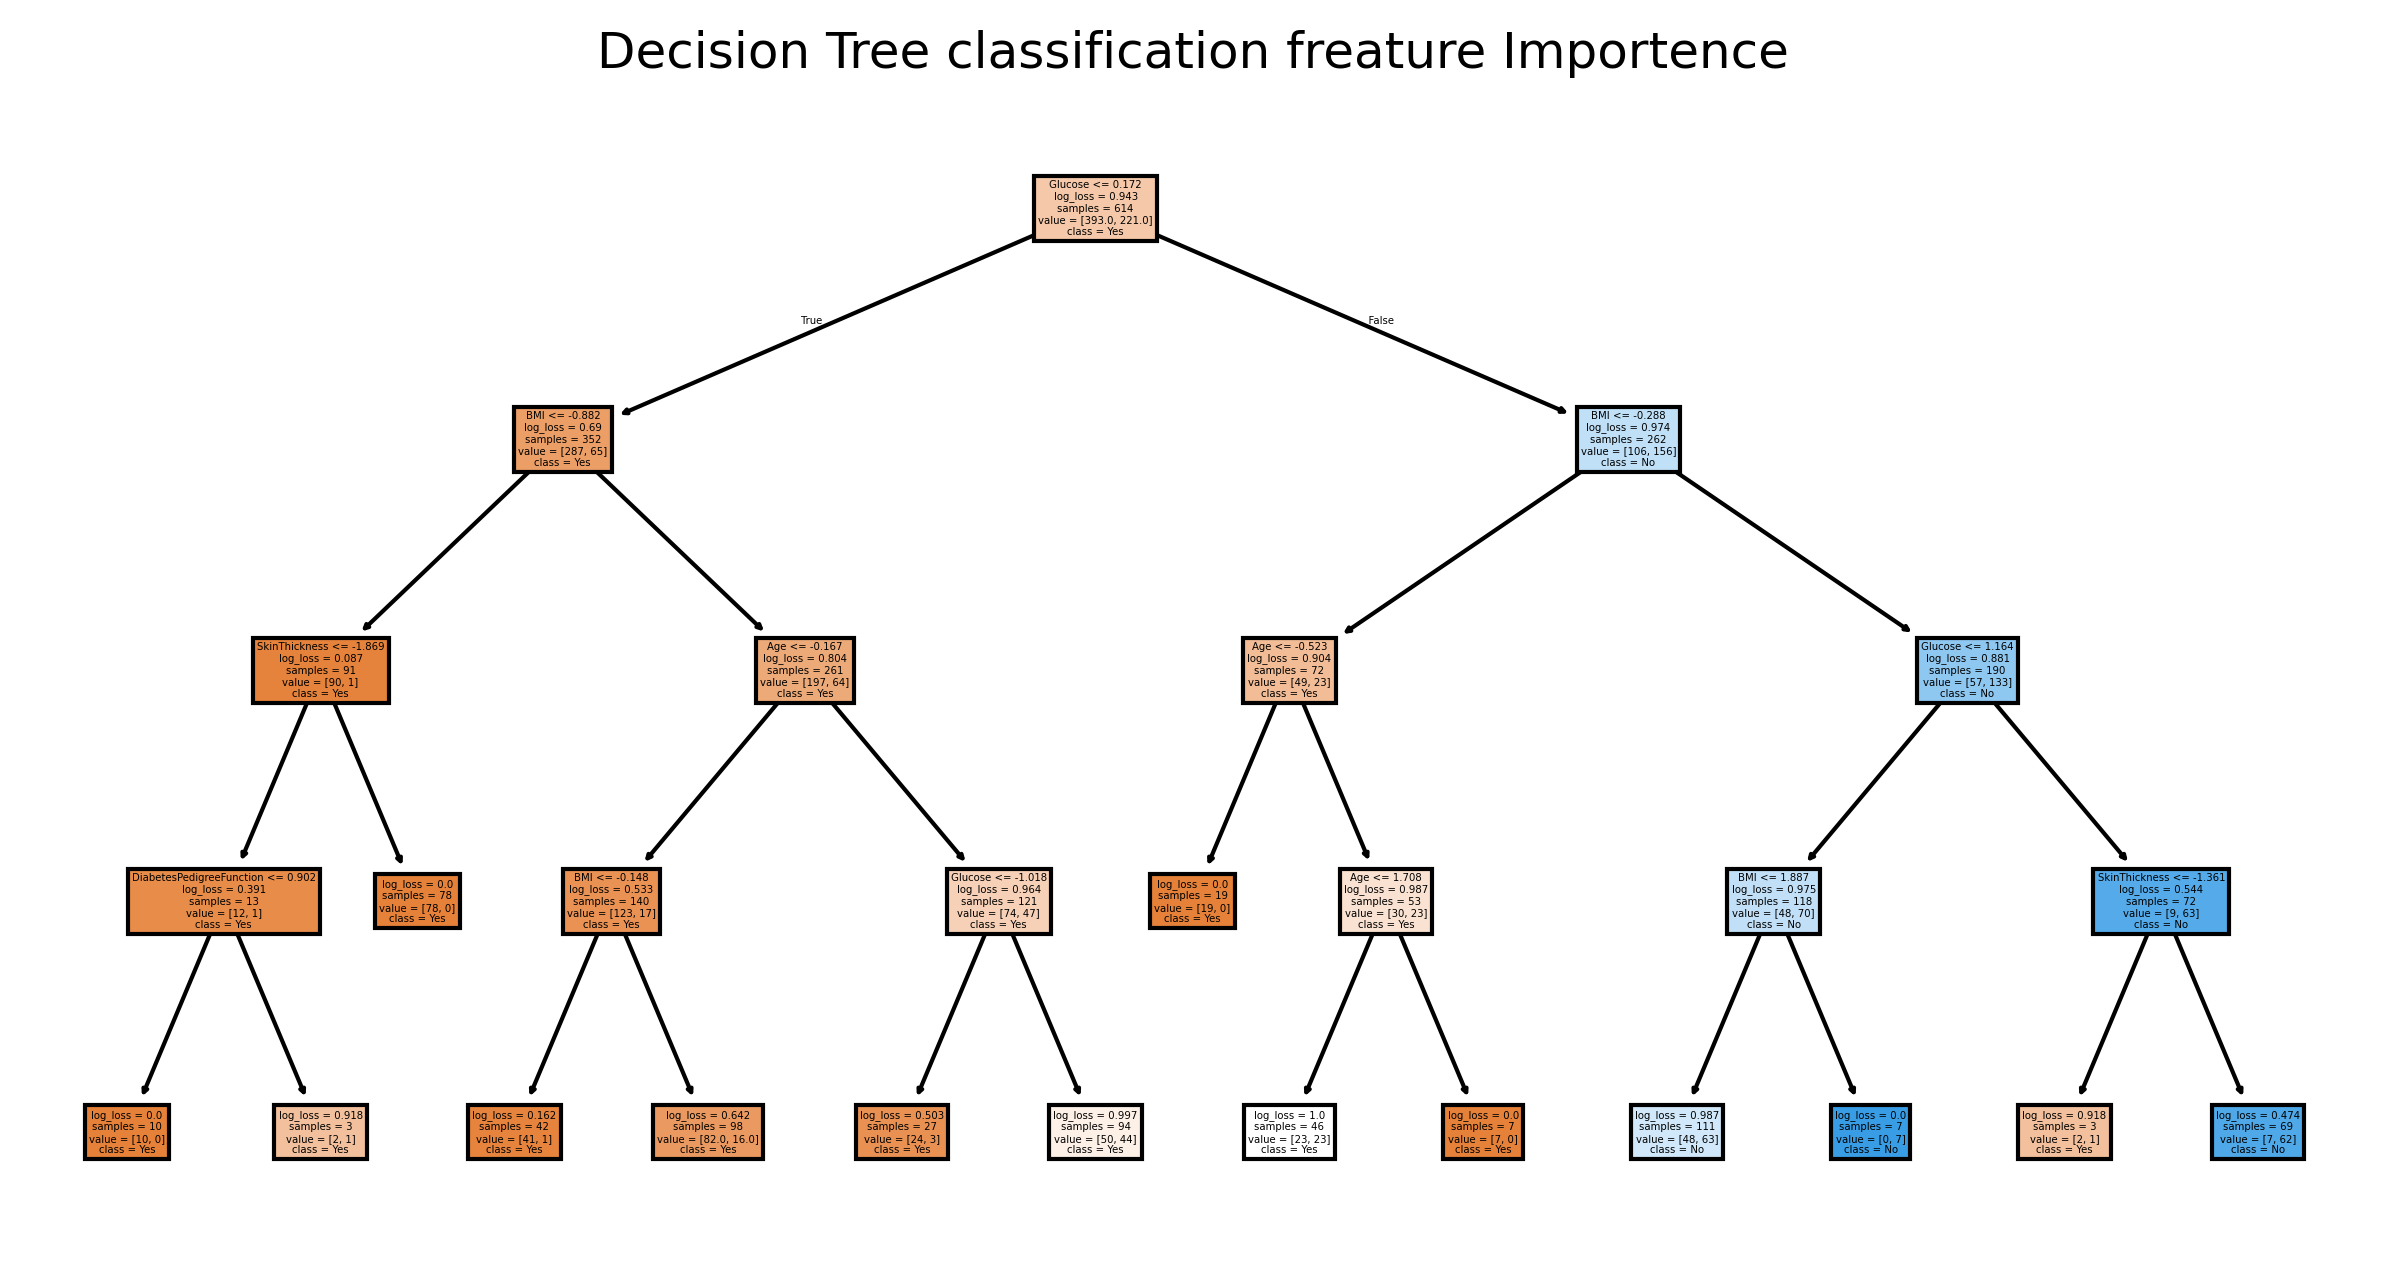

In [219]:
fig,ax=plt.subplots(figsize=(10,5),dpi=300)
plot_tree(decision_model,filled=True,feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                                   'BMI', 'DiabetesPedigreeFunction', 'Age'],class_names=['Yes','No'])
plt.title('Decision Tree classification freature Importence')
plt.show()

In [220]:
feat_imp=pd.DataFrame(data=decision_model.feature_importances_,index=X.columns,columns=['Feature_Importance'])
feature_imp=feat_imp[feat_imp['Feature_Importance']>0]
feature_selection=feature_imp.index.to_list()
X_new=X[feature_selection]

In [221]:
feat_imp

,Feature_Importance
Pregnancies_root,0.000000
Glucose_root,0.496880
BloodPressure_root,0.000000
SkinThickness_root,0.031546
Insulin_root,0.000000
BMI_root,0.280031
DiabetesPedigreeFunction_root,0.011208
Age_box,0.180336


In [222]:
feature_imp

,Feature_Importance
Glucose_root,0.496880
SkinThickness_root,0.031546
BMI_root,0.280031
DiabetesPedigreeFunction_root,0.011208
Age_box,0.180336


In [223]:
X_new

,Glucose_root,SkinThickness_root,BMI_root,DiabetesPedigreeFunction_root,Age_box
0,1.649086,3.770161,2.910268,0.987791,0.910941
1,1.560037,3.514589,2.710783,0.972824,0.901850
2,1.684502,3.223273,2.603812,0.989594,0.902611
3,1.567235,3.223273,2.756362,0.953993,0.890053
4,1.636387,3.770161,3.139074,1.004809,0.903323
...,...,...,...,...,...
763,1.587204,4.158071,2.891704,0.954587,0.913911
764,1.617502,3.422081,2.991862,0.972009,0.898221
765,1.616170,3.223273,2.698327,0.963664,0.901038
766,1.622734,3.223273,2.814572,0.972678,0.910012


In [224]:
X_scale

array([[ 0.76458215,  0.90770402, -0.01490341, ...,  0.25088463,
         0.79941006,  1.36687772],
       [-0.75161486, -1.30453524, -0.53195017, ..., -0.85649766,
        -0.13344507,  0.12700917],
       [ 1.18242423,  1.78753652, -0.70627816, ..., -1.45031289,
         0.91181375,  0.23068399],
       ...,
       [ 0.53248319,  0.08996133, -0.01490341, ..., -0.92564118,
        -0.70443252,  0.01613027],
       [-0.75161486,  0.25302891, -1.05812664, ..., -0.28034358,
        -0.1425626 ,  1.24013498],
       [-0.75161486, -0.95400775, -0.18629711, ..., -0.23317437,
        -0.30587405, -1.04336359]])

In [225]:
scale=StandardScaler()
X_scale_new=scale.fit_transform(X_new)

In [226]:
X_scale_new

array([[ 0.90770402,  0.95536259,  0.25088463,  0.79941006,  1.36687772],
       [-1.30453524,  0.31571817, -0.85649766, -0.13344507,  0.12700917],
       [ 1.78753652, -0.41338922, -1.45031289,  0.91181375,  0.23068399],
       ...,
       [ 0.08996133, -0.41338922, -0.92564118, -0.70443252,  0.01613027],
       [ 0.25302891, -0.41338922, -0.28034358, -0.1425626 ,  1.24013498],
       [-0.95400775,  0.53744329, -0.23317437, -0.30587405, -1.04336359]])

In [227]:
feature_selection

['Glucose_root',
 'SkinThickness_root',
 'BMI_root',
 'DiabetesPedigreeFunction_root',
 'Age_box']

In [228]:
X_train_dt,X_test_dt,y_train_dt,y_test_dt=train_test_split(X_scale_new,y,test_size=0.20,random_state=0)

decision_model=DecisionTreeClassifier(criterion= 'log_loss',max_depth= 4,max_leaf_nodes= 5,min_samples_leaf= 2,
                                      min_samples_split= 2,random_state= 9,splitter= 'random')
decision_model.fit(X_train_dt,y_train_dt)
y_pred_train=decision_model.predict(X_train_dt)
y_pred_test=decision_model.predict(X_test_dt)
accuracy_train=accuracy_score(y_pred_train,y_train_dt)
accuracy_test=accuracy_score(y_pred_test,y_test_dt)
cross_val=cross_val_score(decision_model,X_scale,y,cv=5).mean()
con_mat=confusion_matrix(y_test_dt,y_pred_test)
feature_imp=decision_model.feature_importances_

In [229]:
accuracy_test

0.7857142857142857

In [230]:
accuracy_train

0.7361563517915309

In [231]:
cross_val

0.727900857312622

# Logistic Regression:-

In [232]:
log_train_random=[]
log_test_random=[]

for i in range(0,100):

    X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(X_scale_new,y,test_size=0.2,random_state=i)
    log_model=LogisticRegression()
    log_model.fit(X_train_log,y_train_log)
    y_pred_train=log_model.predict(X_train_log)
    y_pred_test=log_model.predict(X_test_log)
    log_train_random.append(accuracy_score(y_pred_train,y_train_log))
    log_test_random.append(accuracy_score(y_test_log,y_test_log))

In [233]:
np.argmax(log_test_random)

0

In [234]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(X_scale_new,y,test_size=0.2,random_state=np.argmax(log_test_random))

logistic_model=LogisticRegression()
logistic_model.fit(X_train_log,y_train_log)
y_log_pred_train=logistic_model.predict(X_train_log)
y_log_pred_test=logistic_model.predict(X_test_log)
accuracy_log_train=accuracy_score(y_log_pred_train,y_train_log)
accuracy_log_test=accuracy_score(y_log_pred_test,y_test_log)
cross_val_log=cross_val_score(logistic_model,X_scale_new,y,cv=5).mean()
con_mat_log=confusion_matrix(y_test_log,y_log_pred_test)

In [235]:
accuracy_log_test

0.7922077922077922

In [236]:
accuracy_log_train

0.7736156351791531

In [237]:
cross_val_log

0.7643918173329938

In [238]:
con_mat_log

array([[93, 14],
       [18, 29]], dtype=int64)

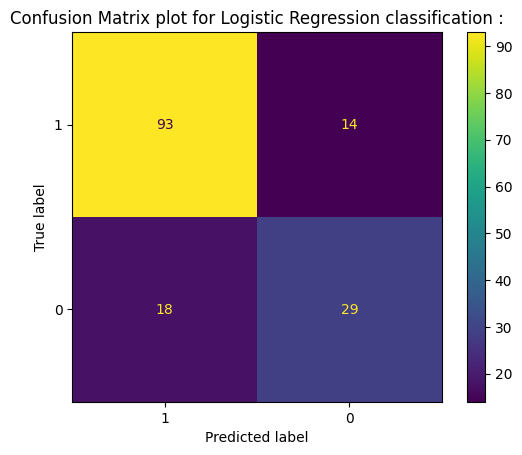

In [239]:
ConfusionMatrixDisplay(con_mat_log,display_labels=df['Outcome'].unique()).plot()
plt.title('Confusion Matrix plot for Logistic Regression classification :')
plt.show()

# SVC model:-

In [240]:
svc_train_random=[]
svc_test_random=[]

for i in range(0,100):

    X_train_svc,X_test_svc,y_train_svc,y_test_svc=train_test_split(X_scale_new,y,test_size=0.2,random_state=i)
    svc_model=SVC()
    svc_model.fit(X_train_svc,y_train_svc)
    y_pred_train=svc_model.predict(X_train_svc)
    y_pred_test=svc_model.predict(X_test_svc)
    svc_train_random.append(accuracy_score(y_pred_train,y_train_svc))
    svc_test_random.append(accuracy_score(y_pred_test,y_test_svc))

In [241]:
np.argmax(svc_test_random)

1

In [242]:
X_train_svc,X_test_svc,y_train_svc,y_test_svc=train_test_split(X_scale_new,y,test_size=0.2,random_state=np.argmax(svc_test_random))

svc_main_model=SVC()
svc_main_model.fit(X_train_svc,y_train_svc)
y_svc_pred_train=svc_main_model.predict(X_train_svc)
y_svc_pred_test=svc_main_model.predict(X_test_svc)
accuracy_svc_train=accuracy_score(y_svc_pred_train,y_train_svc)
accuracy_svc_test=accuracy_score(y_svc_pred_test,y_test_svc)
cross_val_svc=cross_val_score(svc_main_model,X_scale_new,y,cv=5).mean()
con_mat_svc=confusion_matrix(y_test_svc,y_svc_pred_test)

In [243]:
accuracy_svc_train

0.7850162866449512

In [244]:
accuracy_svc_test

0.8246753246753247

In [245]:
cross_val_svc

0.7643663526016466

In [246]:
con_mat_svc

array([[89, 10],
       [17, 38]], dtype=int64)

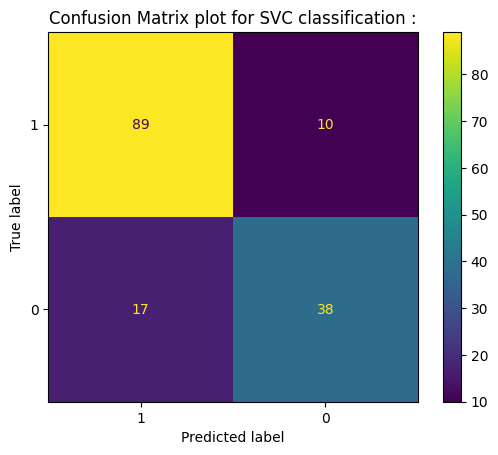

In [247]:
ConfusionMatrixDisplay(con_mat_svc,display_labels=df['Outcome'].unique()).plot()
plt.title('Confusion Matrix plot for SVC classification :')
plt.show()

# ANN:-

In [248]:
test_rand_ann=[]

for i in range(0,10):
    
    X_train_ann,X_test_ann,y_train_ann,y_test_ann=train_test_split(X_scale_new,y,test_size=0.2,random_state=i)
    ann=Sequential()
    ann.add(Dense(input_dim=5,units=9,activation='relu',kernel_initializer='uniform'))
    ann.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))
    ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])
    ann.fit(X_train_ann,y_train_ann,batch_size=5,epochs=100)
    ann_test_pred=ann.predict(X_test_ann)
    ann_best=(ann_test_pred>0.5)
    test_rand_ann.append(accuracy_score(y_test_ann,ann_best))
    
print(np.argmax(test_rand_ann))

Epoch 1/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Accuracy: 0.5980 - loss: 0.6874
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - Accuracy: 0.7497 - loss: 0.6275
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.7829 - loss: 0.5339
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.7591 - loss: 0.4965
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.7801 - loss: 0.4702
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - Accuracy: 0.7617 - loss: 0.4698
Epoch 7/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.7545 - loss: 0.5119
Epoch 8/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.7692 - loss: 0.4926
Epoch 9/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.7798 - loss: 0.4787
Epoch 10/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.7957 - loss: 0.4480
Epoch 11/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.7673 - loss: 0.4586
Epoch 12/100
123/123 ━━━━━━━━━━━━━━━━

In [249]:
X_train_ann,X_test_ann,y_train_ann,y_test_ann=train_test_split(X_scale_new,y,test_size=0.2,random_state=np.argmax(test_rand_ann))
ann=Sequential()
ann.add(Dense(input_dim=5,units=9,activation='relu',kernel_initializer='uniform'))
ann.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

In [250]:
import os
import time

In [251]:
log_dir="C:/DataScience/log/fit/"+time.asctime().replace(" ","_").replace(":","_")
tensorboard_cb=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [252]:
ann.fit(x=X_train_ann,y=y_train_ann,batch_size=5,epochs=100,callbacks=tensorboard_cb)
ann_test_pred=ann.predict(X_test_ann)
ann_best=(ann_test_pred>0.5)
print("Accuracy of ANN model :",accuracy_score(y_test_ann,ann_best))

Epoch 1/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.6633 - loss: 0.6852
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.6733 - loss: 0.6075
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7347 - loss: 0.5381
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7443 - loss: 0.4796
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7679 - loss: 0.4831
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7819 - loss: 0.4766
Epoch 7/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7374 - loss: 0.5327
Epoch 8/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7962 - loss: 0.4466
Epoch 9/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7745 - loss: 0.4601
Epoch 10/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7735 - loss: 0.4663
Epoch 11/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7804 - loss: 0.4733
Epoch 12/100
123/123 ━━━━━━━━━━━━━━━━━━━━

In [255]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [256]:
%tensorboard --logdir C:/DataScience/log/fit

Reusing TensorBoard on port 6007 (pid 23476), started 0:00:31 ago. (Use '!kill 23476' to kill it.)